## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 imbalanced-learn==0.10.1 xgboost==2.0.3 threadpoolctl==3.3.0 -q --user

**Note:** After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)


# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# to create pipeline and make_pipeline
from sklearn.pipeline import Pipeline, make_pipeline

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")

In [3]:
import dtale

## Loading the dataset

In [4]:
# loading the training and test datasets
data = pd.read_csv("Train.csv.csv")
data_test = pd.read_csv("Test.csv.csv")

In [5]:
# checking if the datasets was read correctly
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [6]:
data_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


In [7]:
# making copies of the datasets
wind = data.copy()
wind_test = data_test.copy()

In [8]:
wind.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [9]:
wind_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


> Both the training and test data has been loaded correctly and a copy made.

## Data Overview

>The initial steps to get an overview of any dataset is to: 
>- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
>- get information about the number of rows and columns in the dataset
>- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
>- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [10]:
# Function to perform the data overview: shape, info, describe, missing vakues, duplicates, head and tail

from IPython.display import display, HTML
def display_dataframe_info(data_display, df_name="Your Dataframe Name", title="Dataframe Information"):
    """
    Displays detailed information about a dataframe using IPython.display and formatting.

    Args:
        data_display: The Pandas DataFrame to analyze.
        title (optional): A title for the displayed information.
        df_name (optional): The name of the dataframe to display after the title.

    Returns:
        None
    """
    display(HTML(f"<h1 style='font-weight: bold'>{title} for {df_name}</h1>"))

    # Display shape, info and description

    display(HTML(f"<p style='font-weight: bold'>Shape:</p>"))
    display(data_display.shape)
    display(HTML(f"<p style='font-weight: bold'>Information:</p>"))
    display(data_display.info())
    display(HTML(f"<p style='font-weight: bold'>Description:</p>"))
    display(data_display.describe(include = "all").T)
    
    # Display head and tail

    display(HTML(f"<p style='font-weight: bold'>Head (First 5 rows):</p>"))
    display(data_display.head())
    display(HTML(f"<p style='font-weight: bold'>Tail (Last 5 rows):</p>"))
    display(data_display.tail())

    # Display duplicates

    duplicate_count = data_display.duplicated().sum()
    display(HTML(f"<p style='font-weight: bold'>Duplicates:</p>"))
    display(f"Number of duplicate rows: {duplicate_count}")

    # Optionally show specific duplicates

    if duplicate_count > 0:
        display(HTML(f"<p style='font-weight: bold'>Duplicate Rows:</p>"))
        display(data_display[data_display.duplicated()])
        
    # Display missing values

    display(HTML(f"<p style='font-weight: bold'>Missing Values:</p>"))
    missing_values_df = data_display.isnull().sum().reset_index(name="Count")
    missing_values_df["Percentage"] = (
        missing_values_df["Count"] / data_display.shape[0]
    ) * 100
    top_missing_values = missing_values_df.nlargest(5, "Count").rename(
        columns={"index": "Column Name"}
    )
    display(top_missing_values)


In [11]:
display_dataframe_info(data,"ReneWind", "Predictive Maintenance")

(20000, 41)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

None

,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071318,-1.088279,-0.796174,-3.011720,-2.287540,2.807310,0.481428,0.105171,-0.586599,-2.899398,...,-8.273996,5.745013,0.589014,-0.649988,-3.043174,2.216461,0.608723,0.178193,2.927755,1
19996,2.890264,2.483069,5.643919,0.937053,-1.380870,0.412051,-1.593386,-5.762498,2.150096,0.272302,...,-4.159092,1.181466,-0.742412,5.368979,-0.693028,-1.668971,3.659954,0.819863,-1.987265,0
19997,-3.896979,-3.942407,-0.351364,-2.417462,1.107546,-1.527623,-3.519882,2.054792,-0.233996,-0.357687,...,7.112162,1.476080,-3.953710,1.855555,5.029209,2.082588,-6.409304,1.477138,-0.874148,0
19998,-3.187322,-10.051662,5.695955,-4.370053,-5.354758,-1.873044,-3.947210,0.679420,-2.389254,5.456756,...,0.402812,3.163661,3.752095,8.529894,8.450626,0.203958,-7.129918,4.249394,-6.112267,0
19999,-2.686903,1.961187,6.137088,2.600133,2.657241,-4.290882,-2.344267,0.974004,-1.027462,0.497421,...,6.620811,-1.988786,-1.348901,3.951801,5.449706,-0.455411,-2.202056,1.678229,-1.974413,0


'Number of duplicate rows: 0'

,Column Name,Count,Percentage
0,V1,18,0.09
1,V2,18,0.09
2,V3,0,0.00
3,V4,0,0.00
4,V5,0,0.00


> 1.  There are 20,000 rows of data and 41 variables
> 2.  All the variables are float with the exception of the target variable which is interger, some are missing values
> 3.   
> 4.  There are no duplicated rows
> 5.  V1 and V2 have 18 missing data each

### Checking the distribution of the target variable in the train and test dataset

In [12]:
wind["Target"].value_counts(1)

0    0.9445
1    0.0555
Name: Target, dtype: float64

In [13]:
wind_test["Target"].value_counts(1)

0    0.9436
1    0.0564
Name: Target, dtype: float64

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

### **Note**: The EDA section has been covered multiple times in the previous case studies. In this case study, we will mainly focus on the model building aspects. We will only be looking at the key observations from EDA. The detailed EDA can be found in the <a href = #link1>appendix section</a>.

## Univariate Analysis

### Plotting histograms and boxplots for all the variables

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

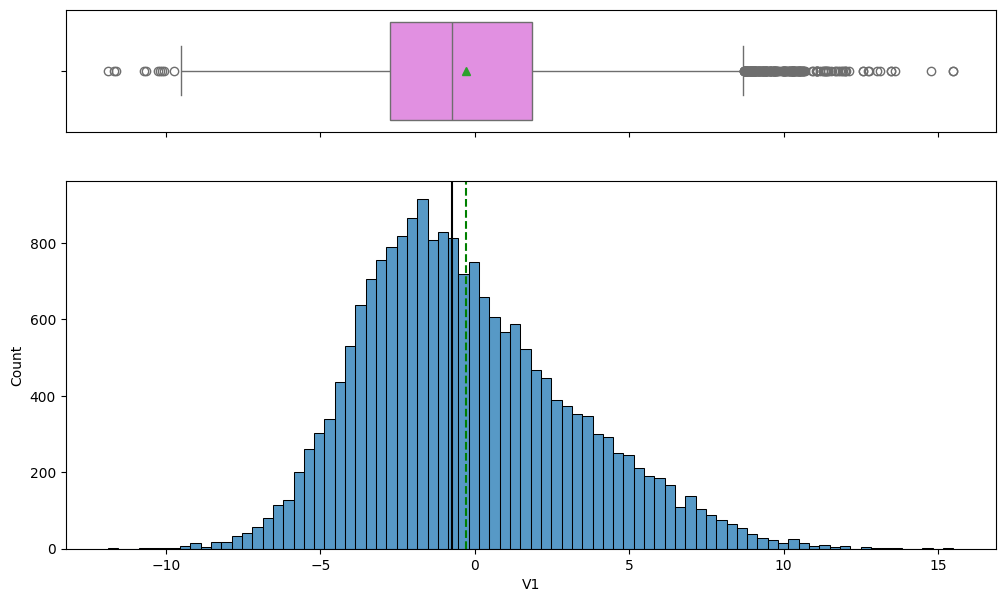

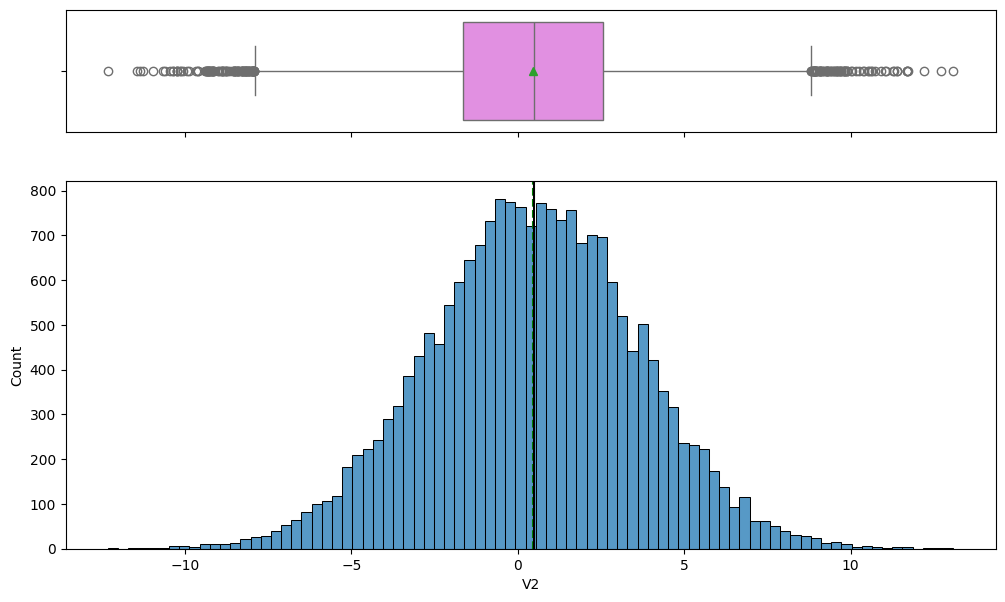

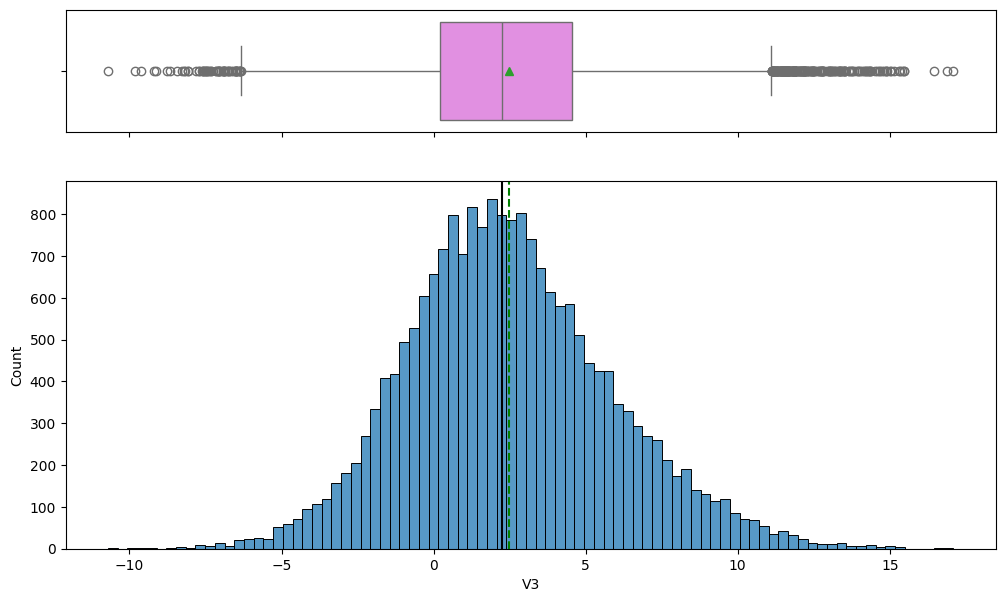

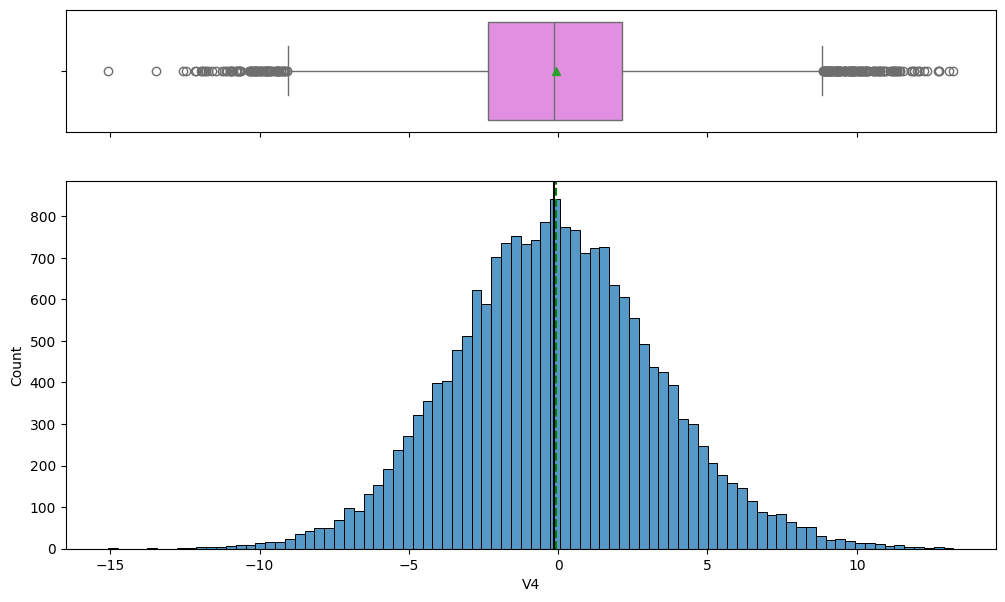

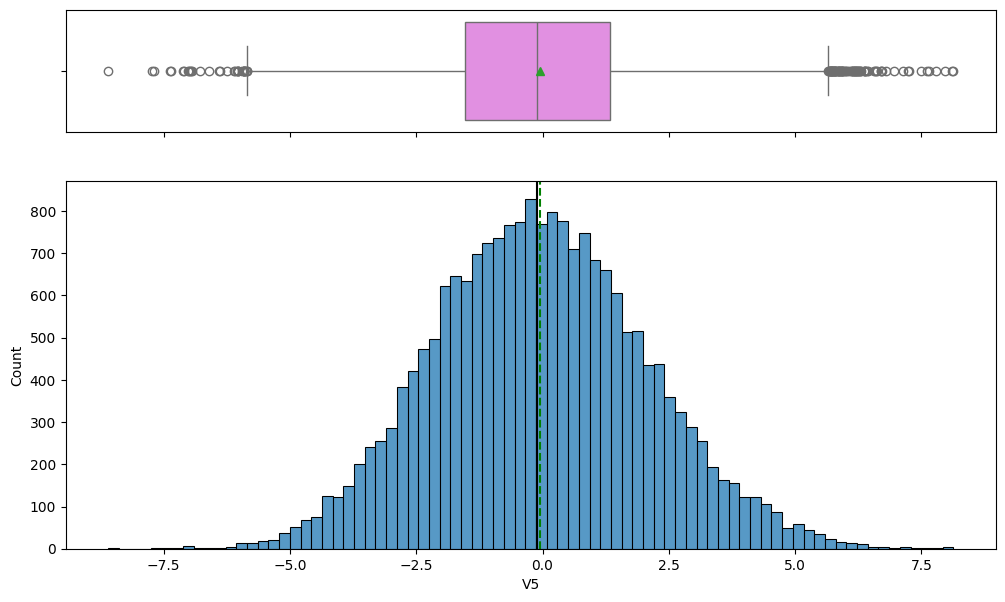

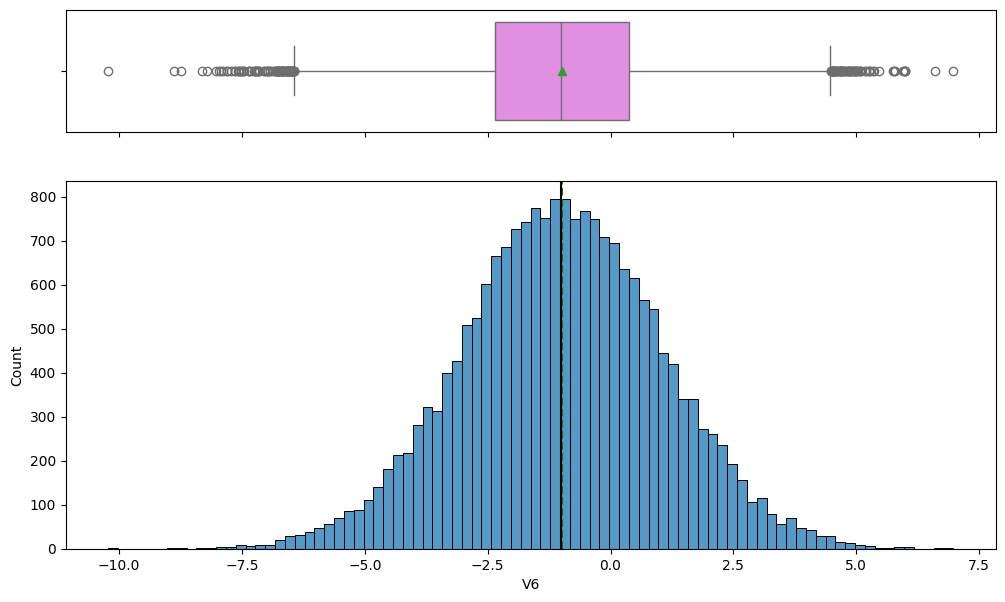

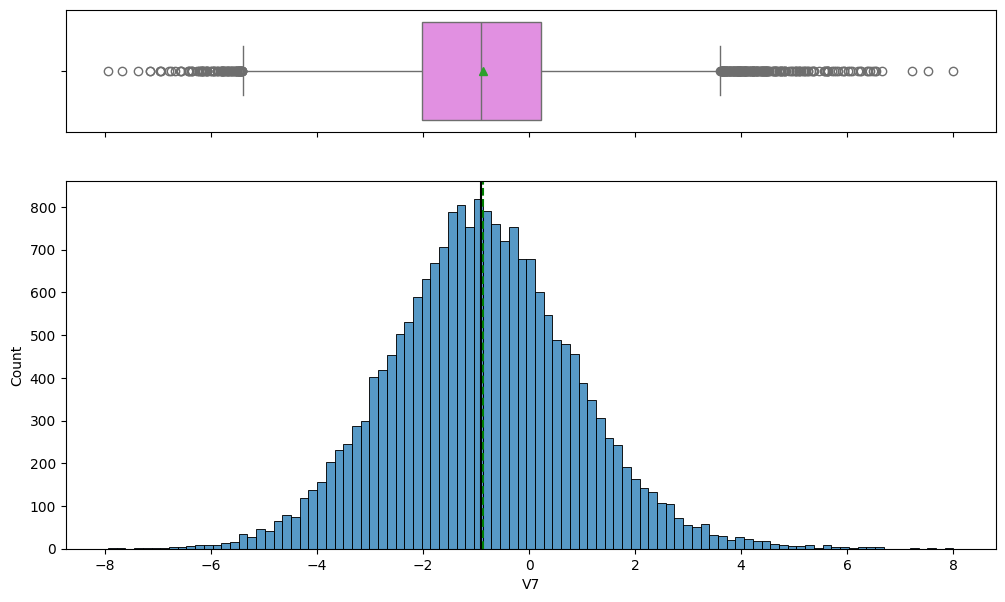

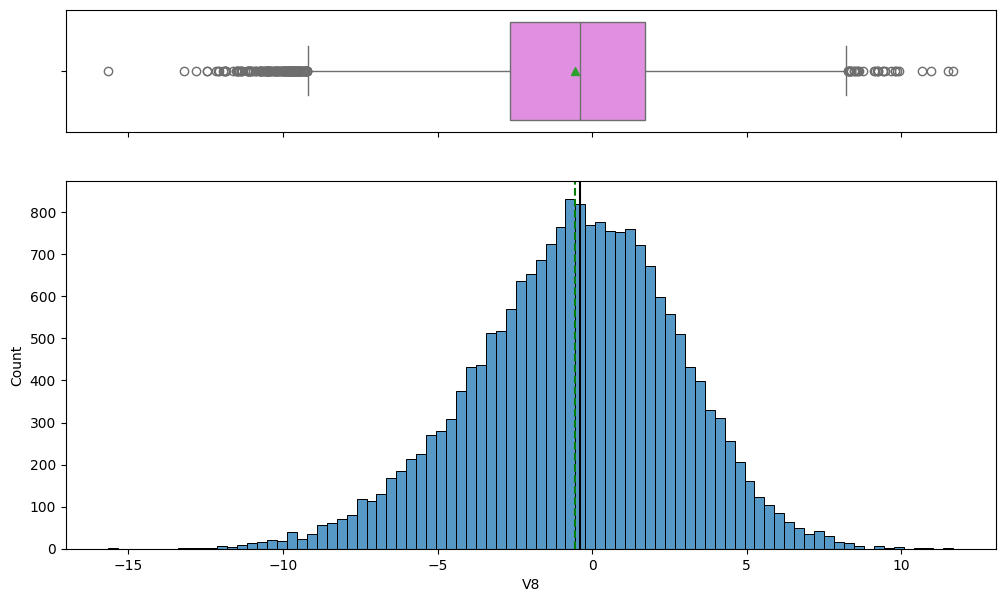

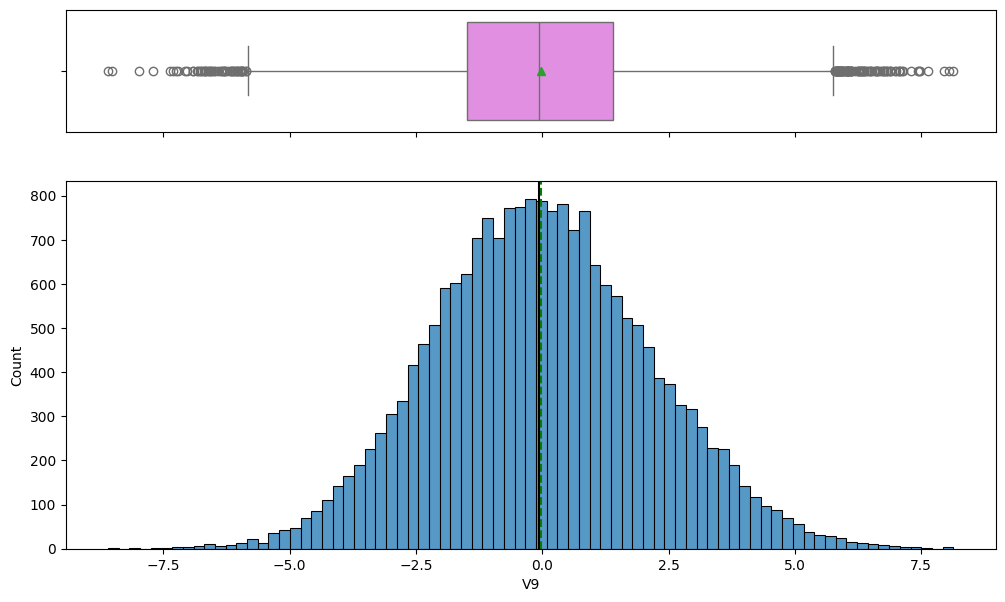

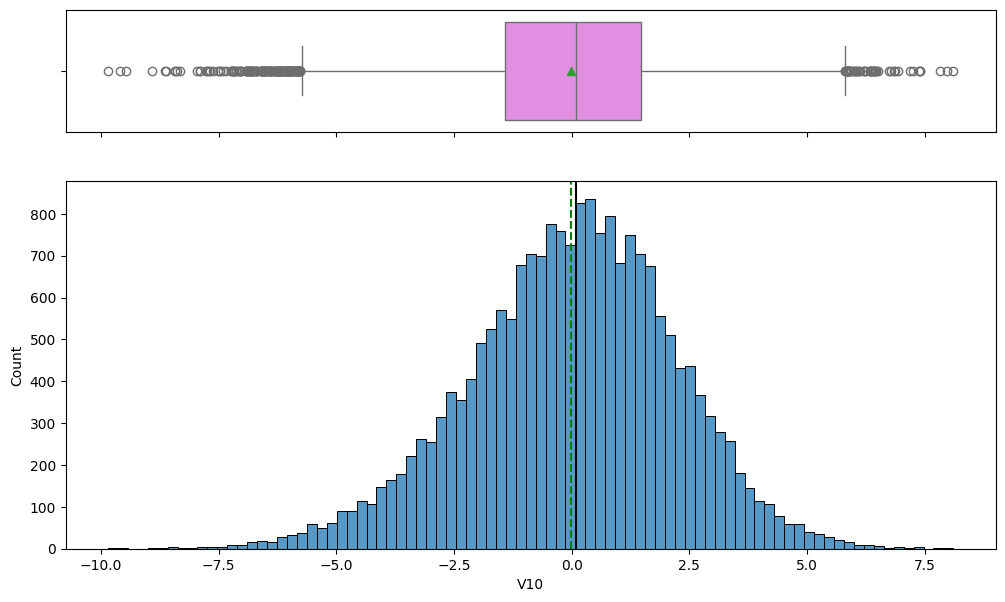

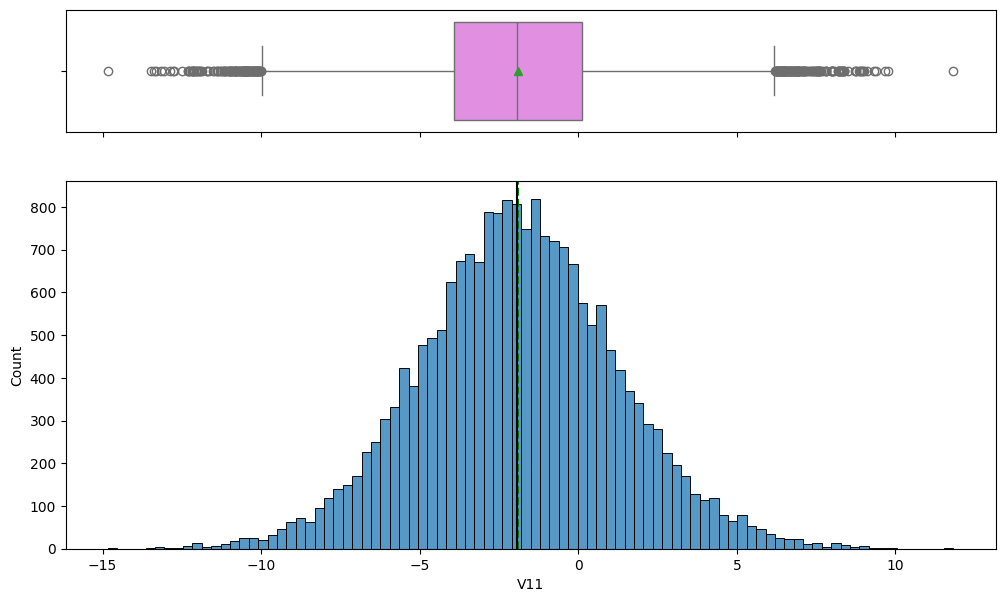

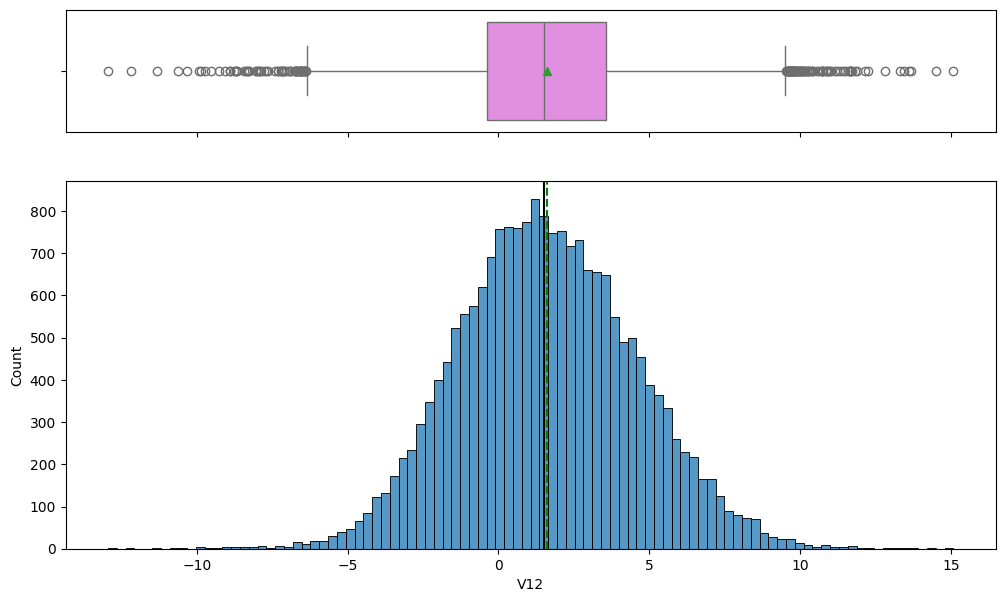

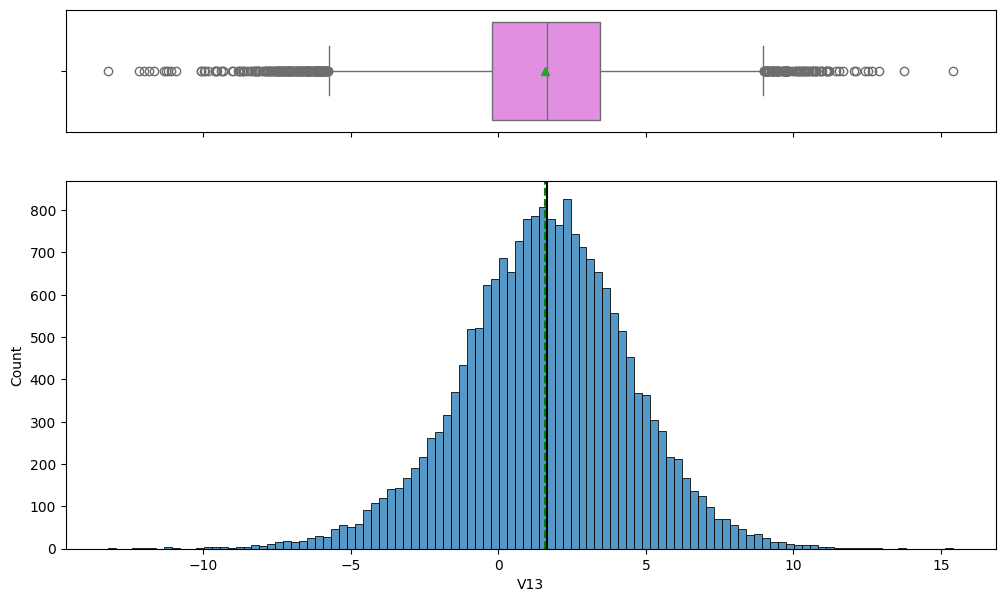

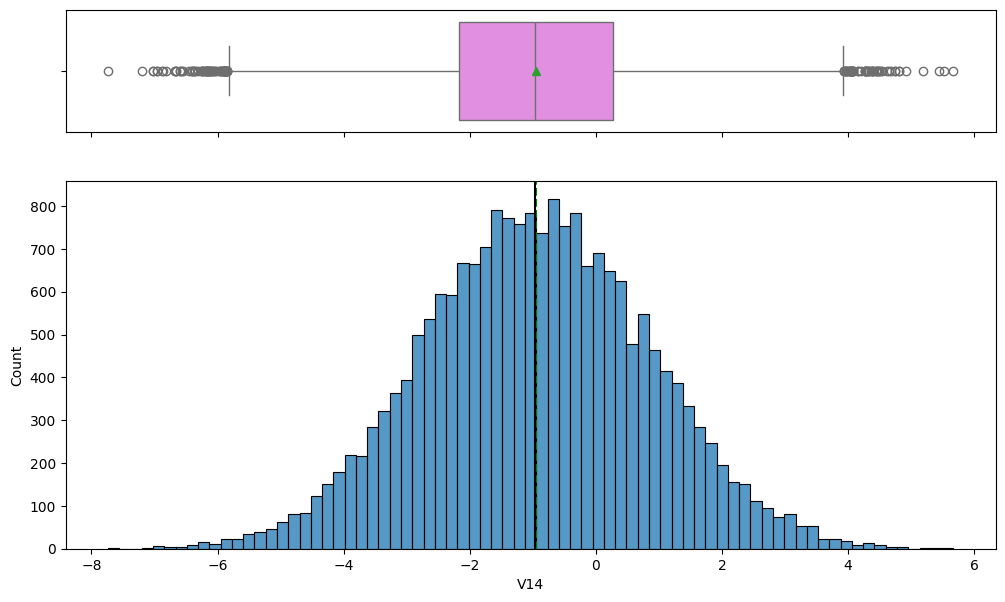

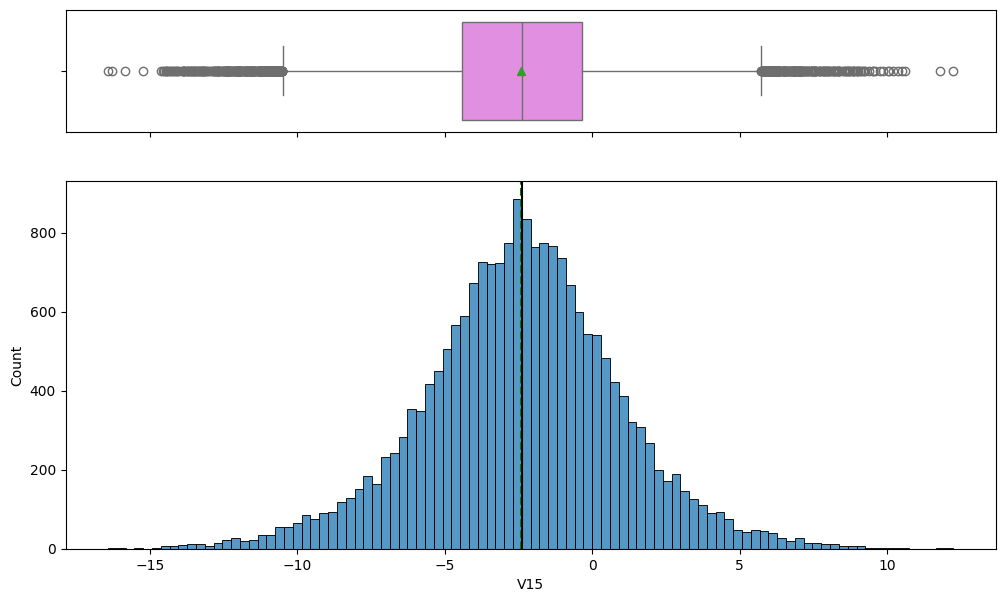

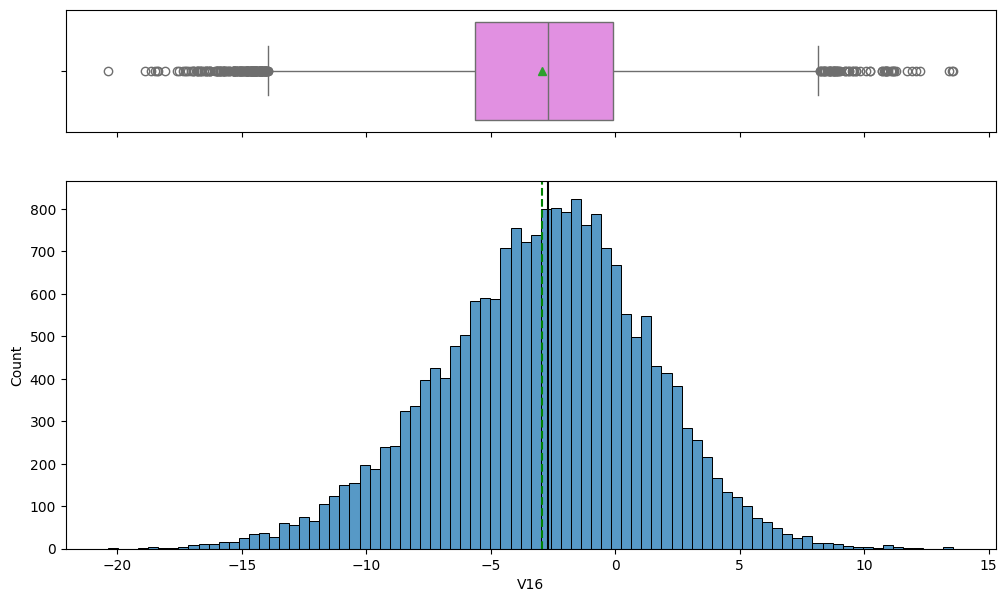

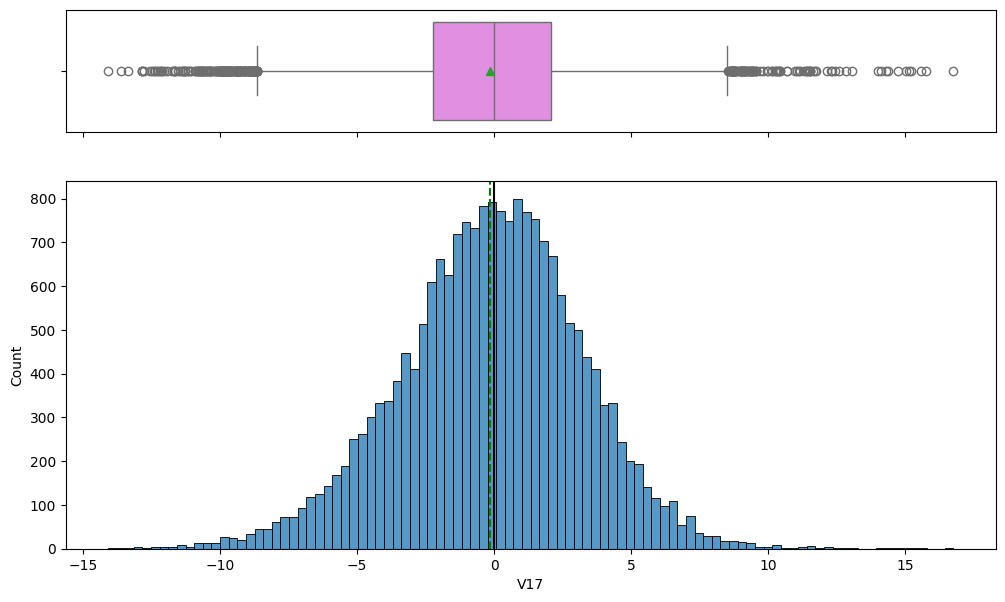

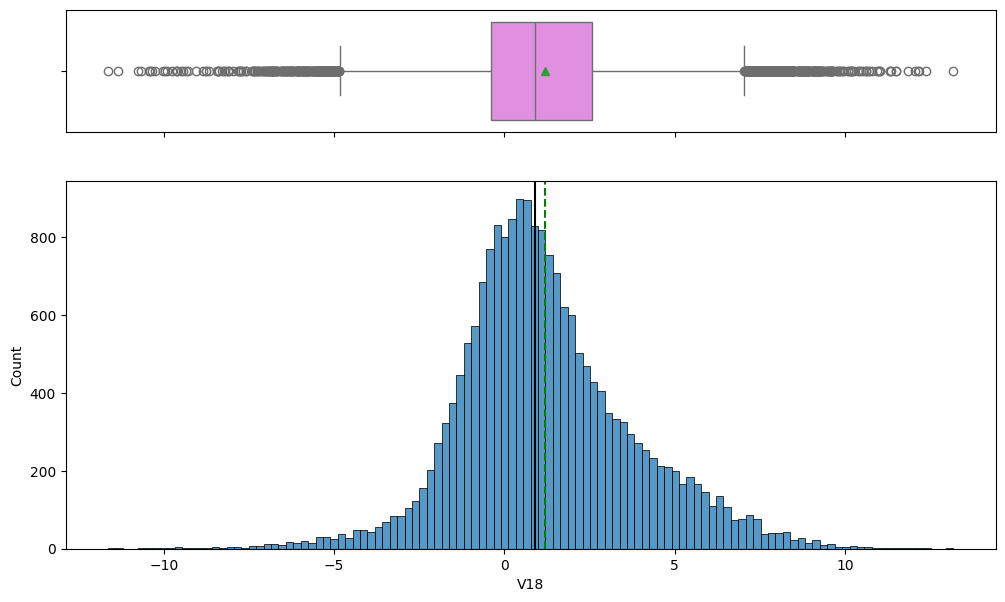

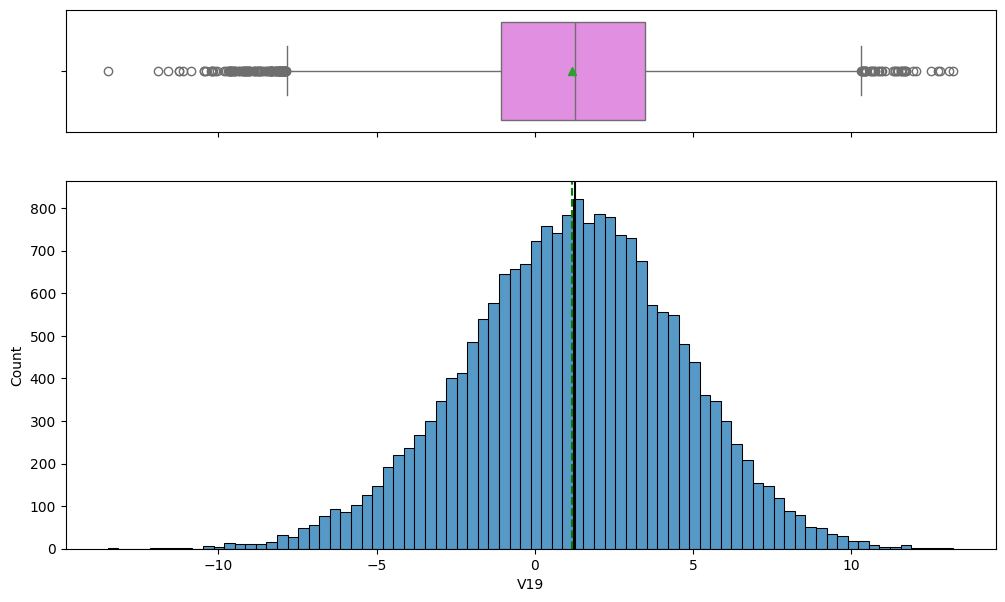

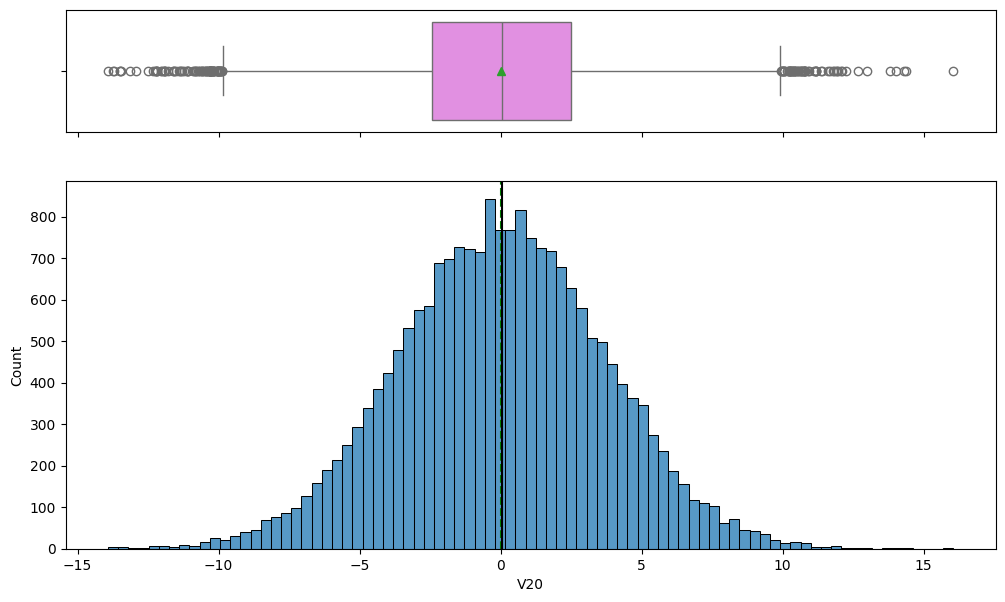

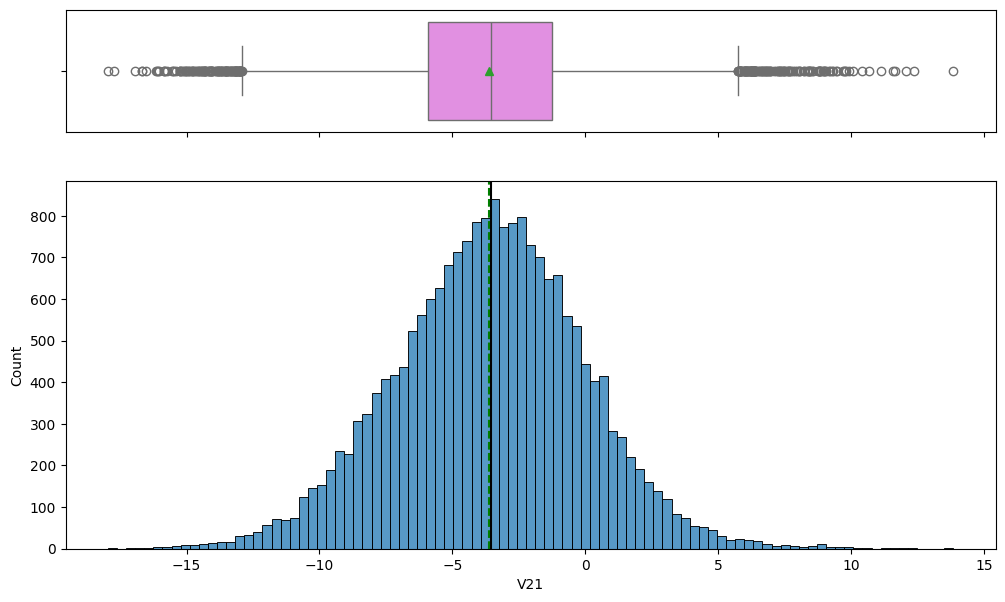

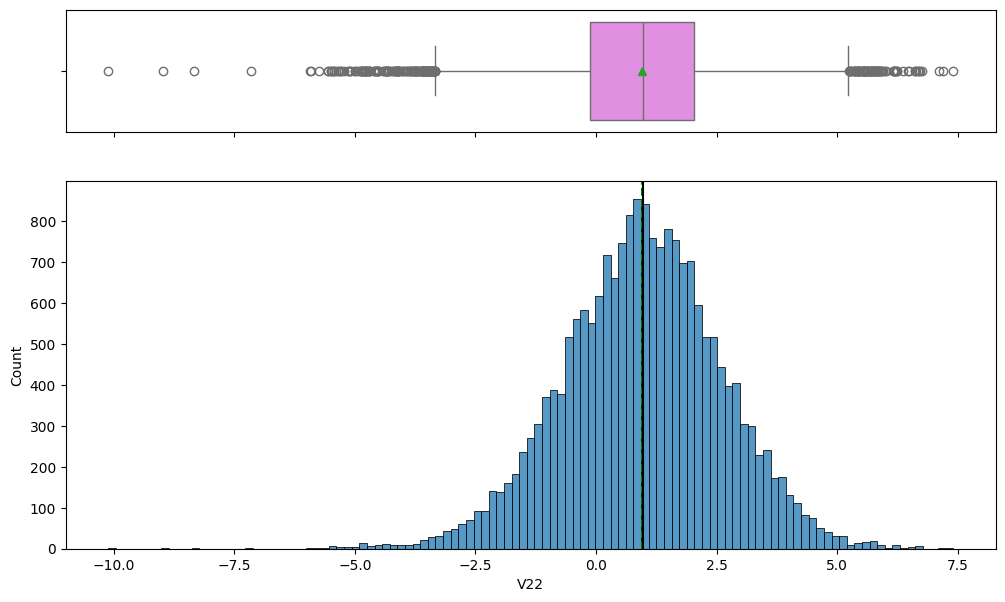

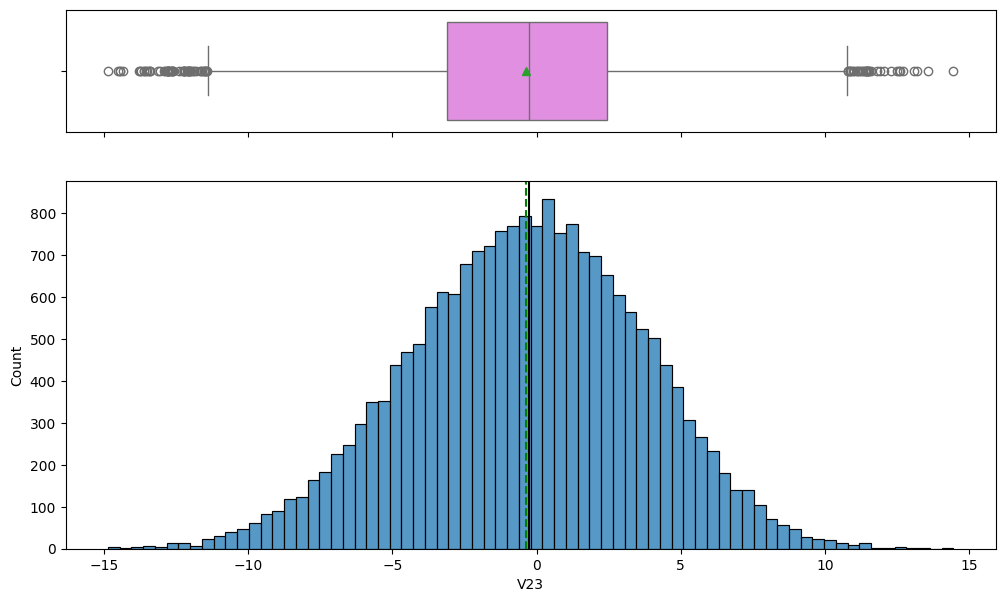

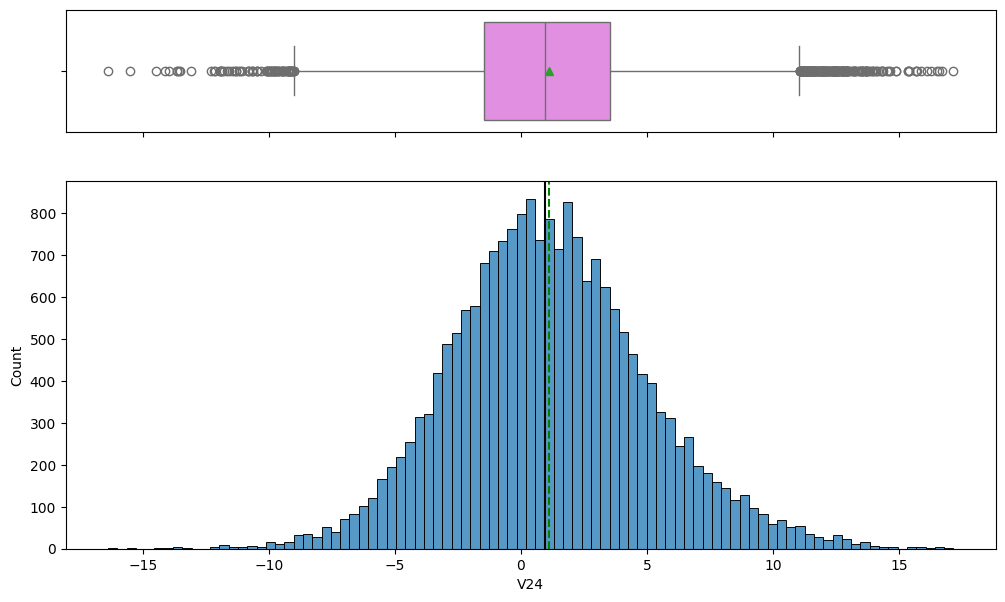

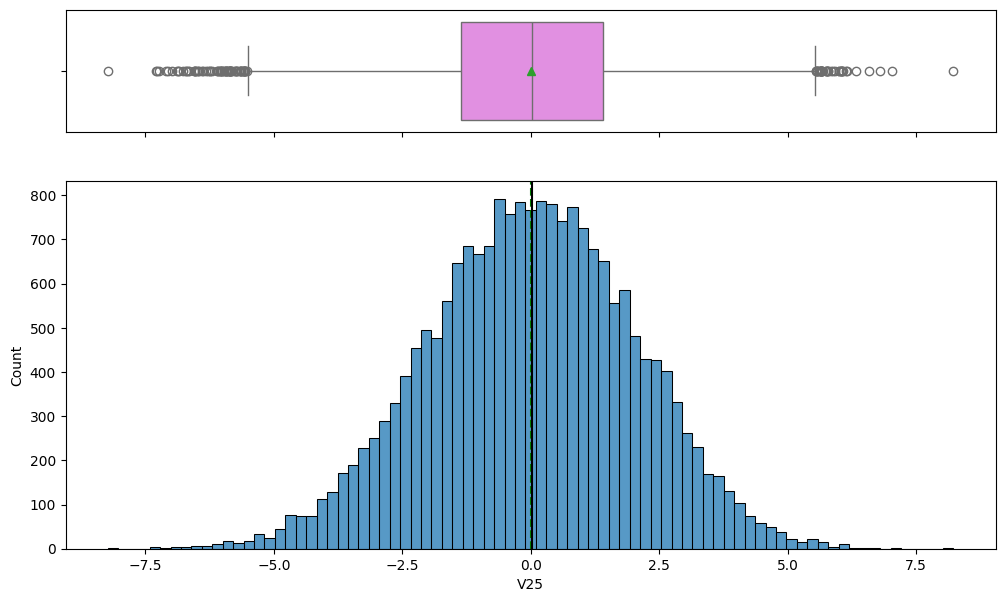

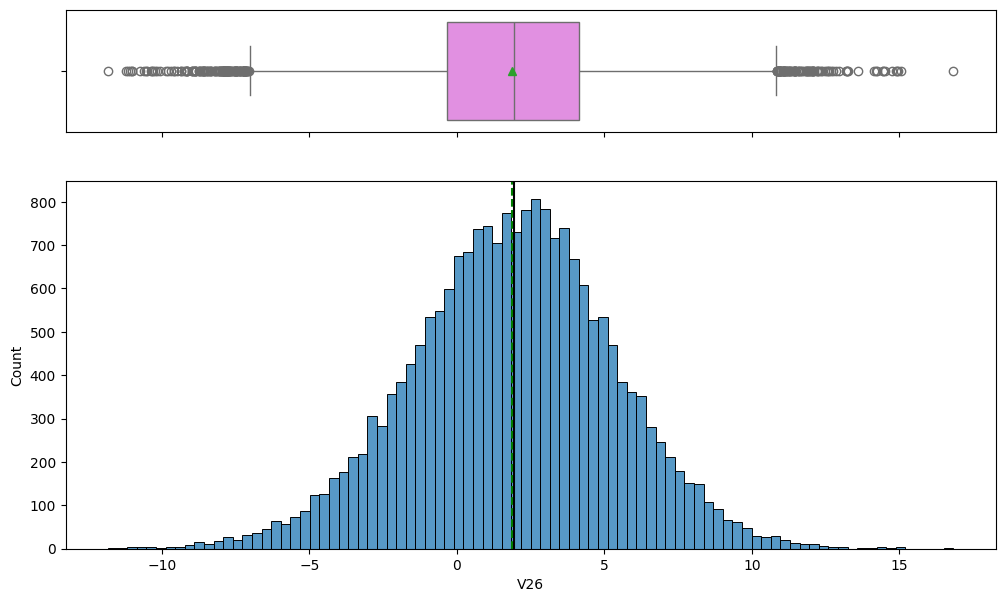

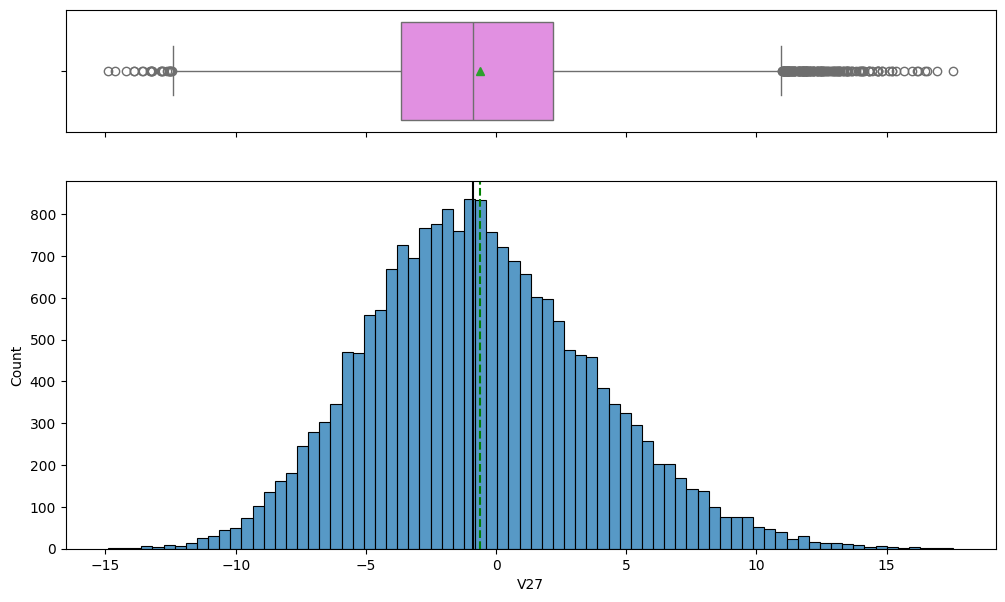

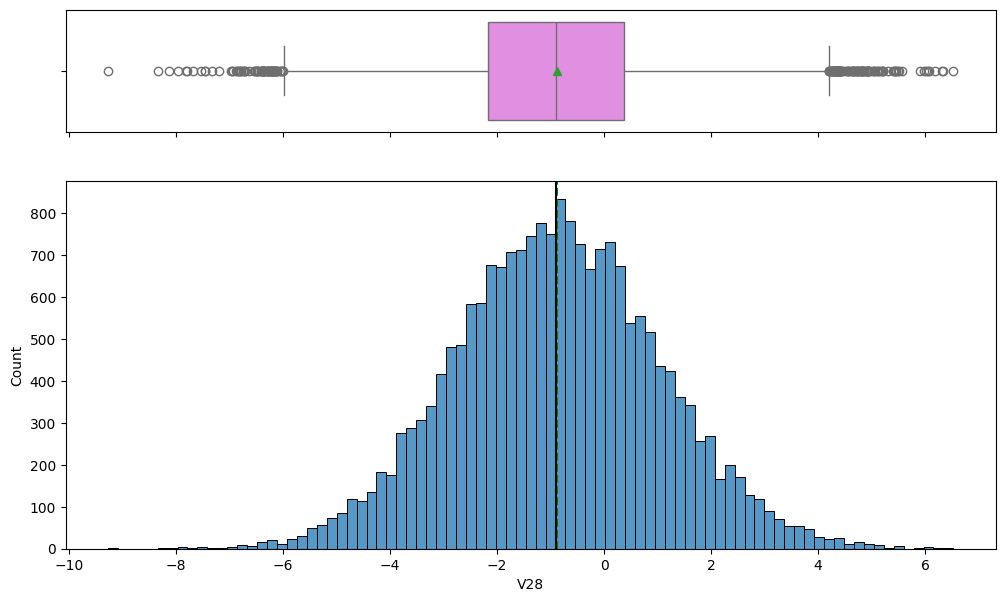

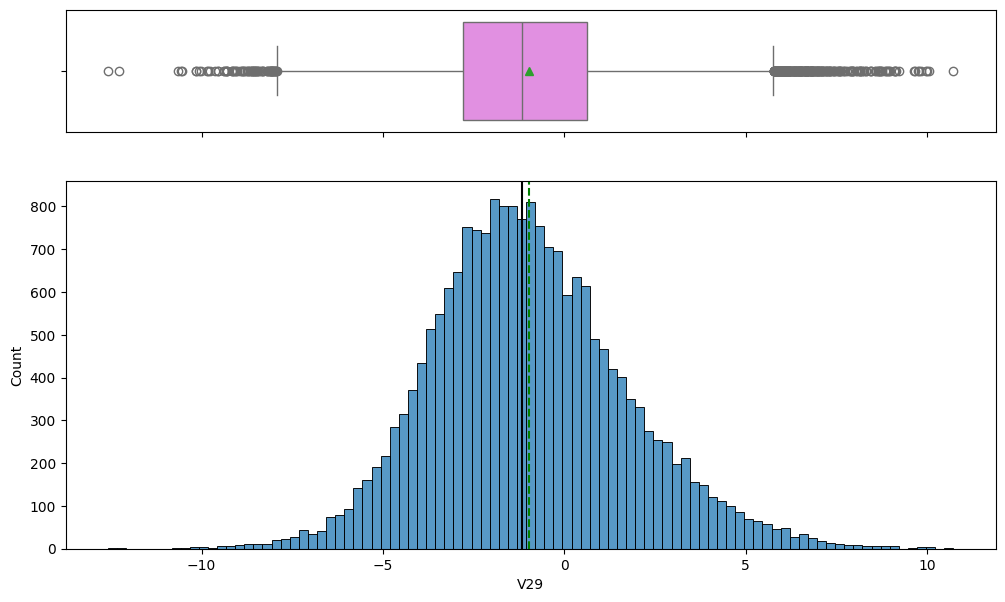

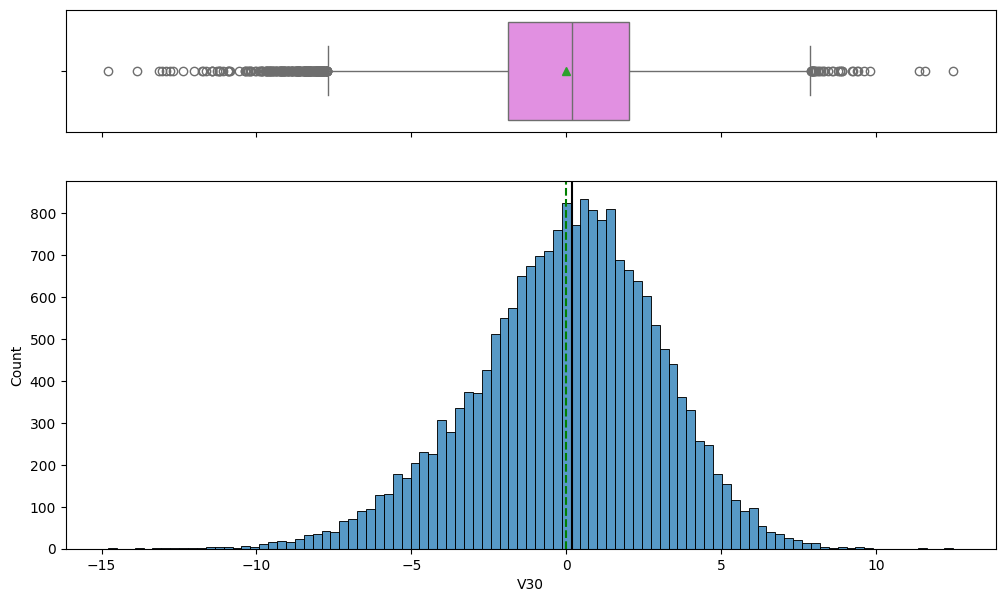

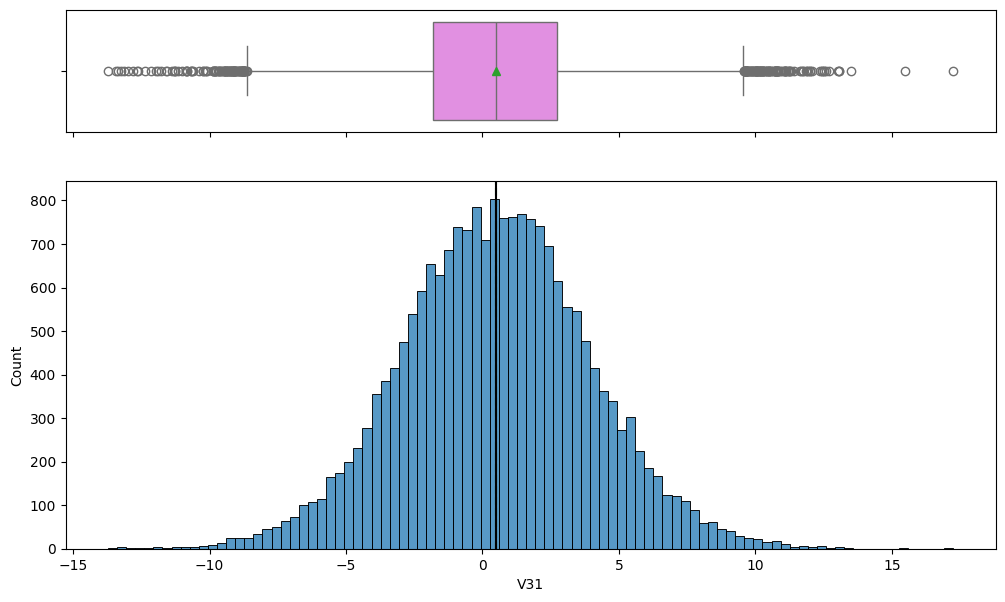

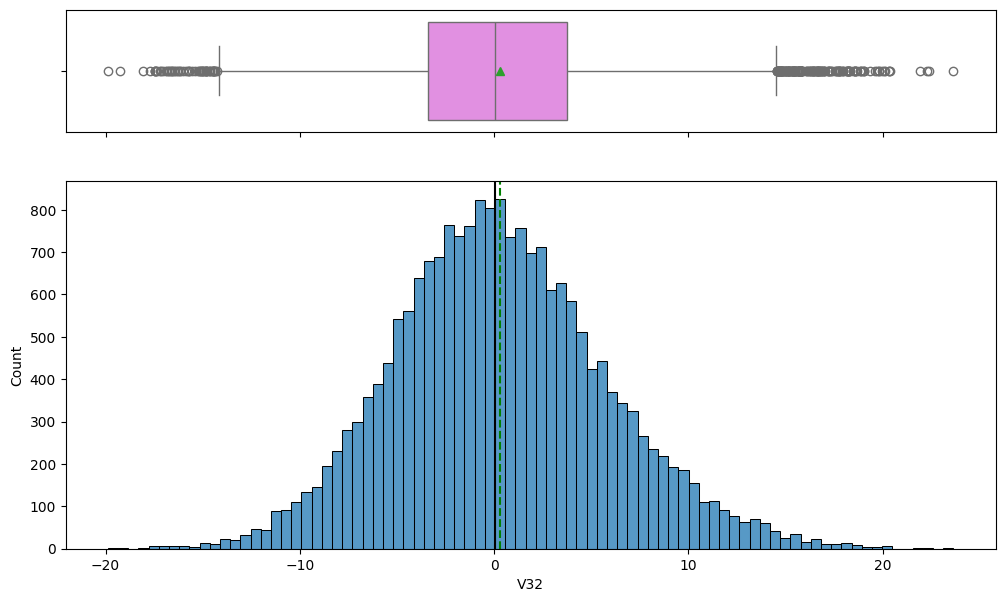

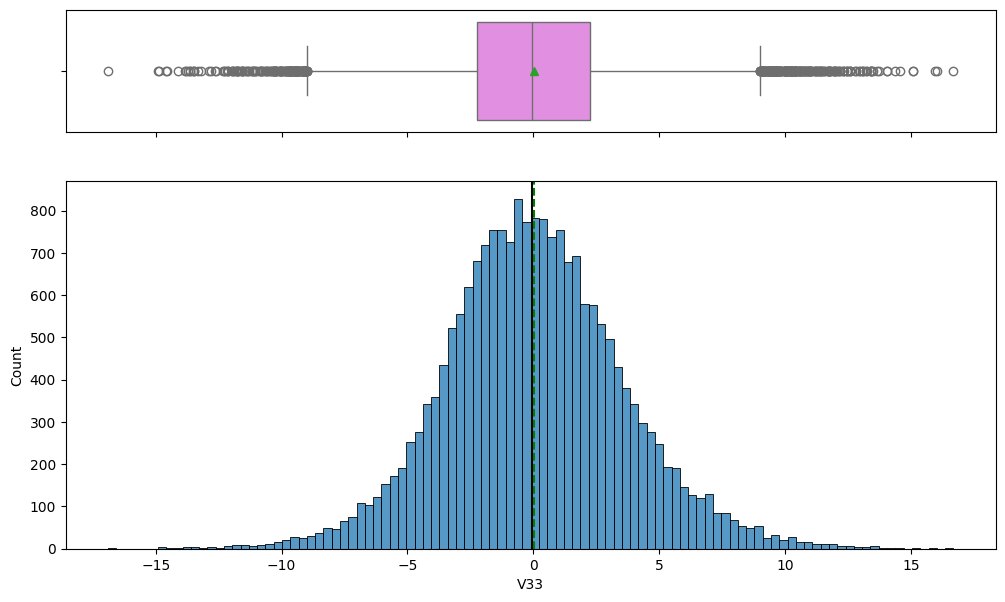

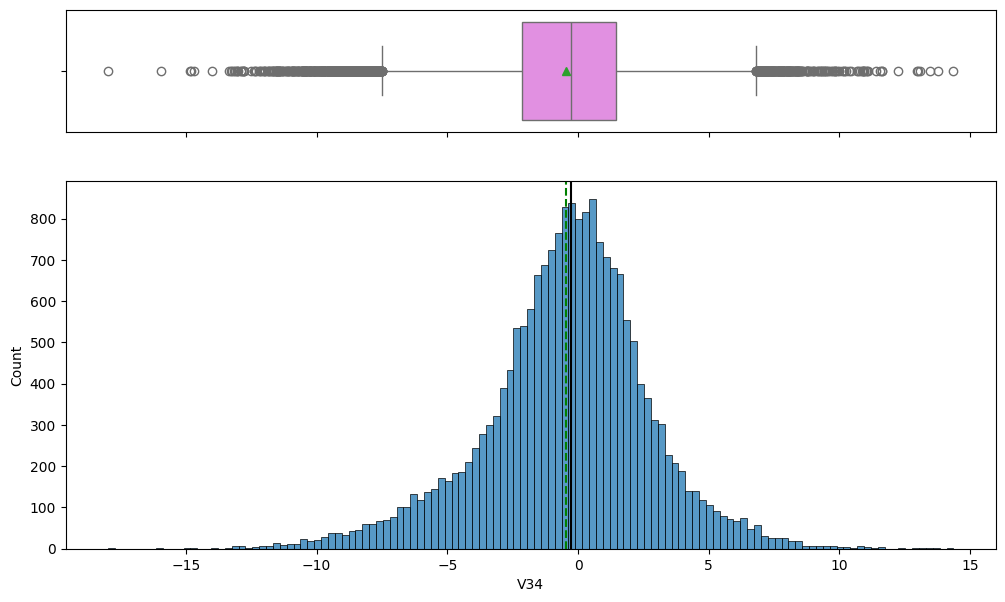

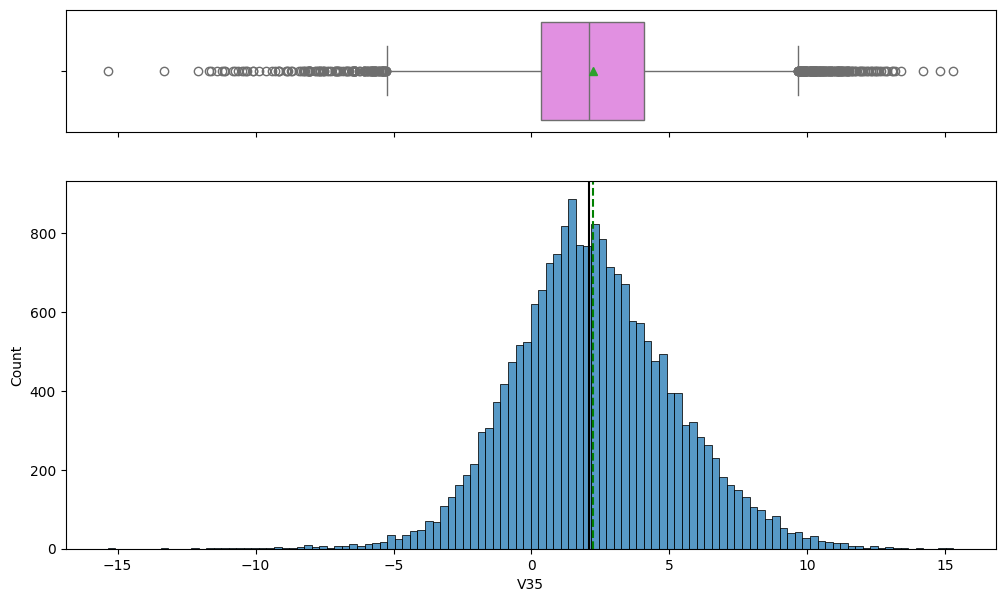

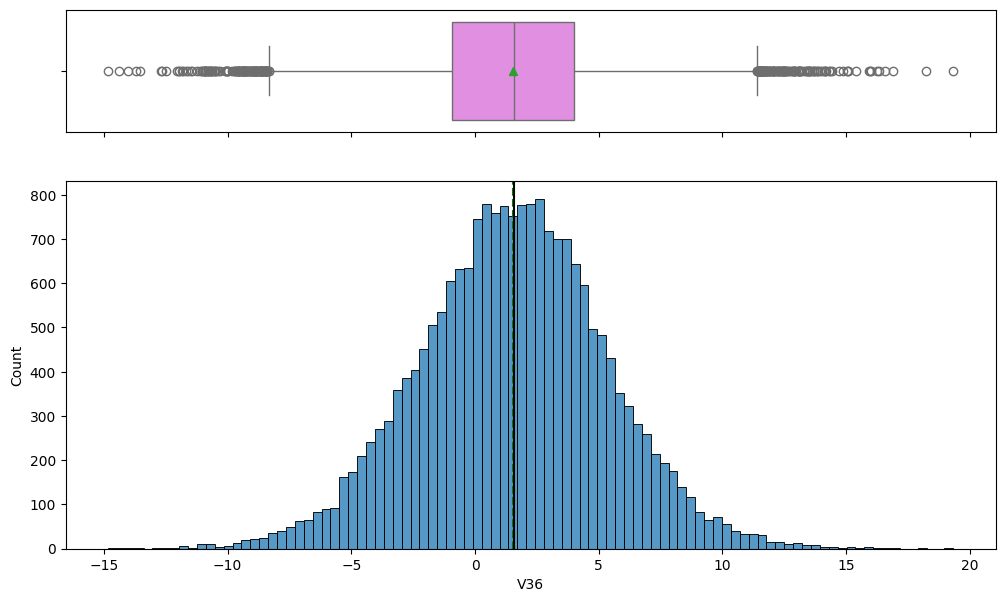

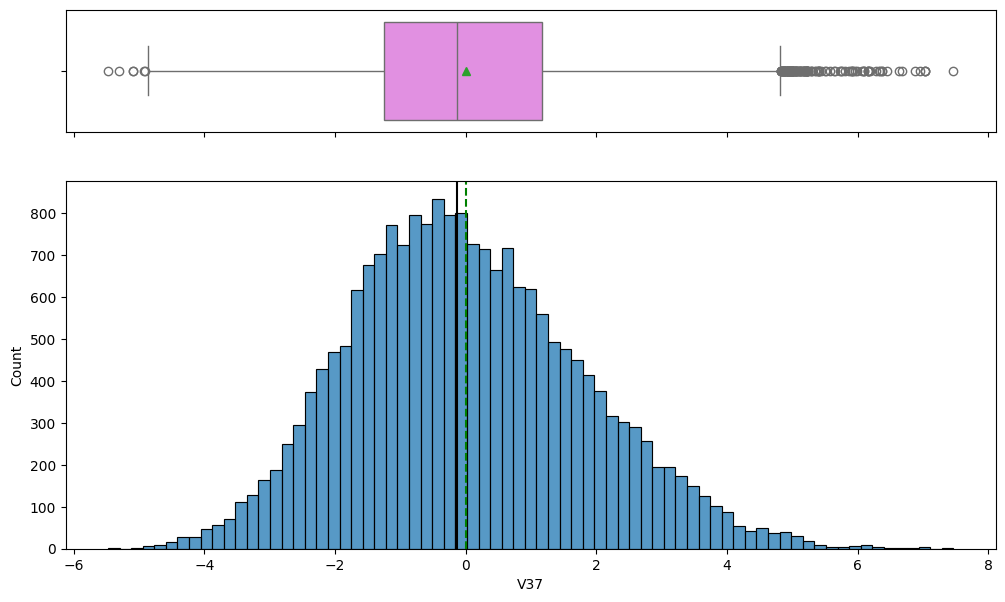

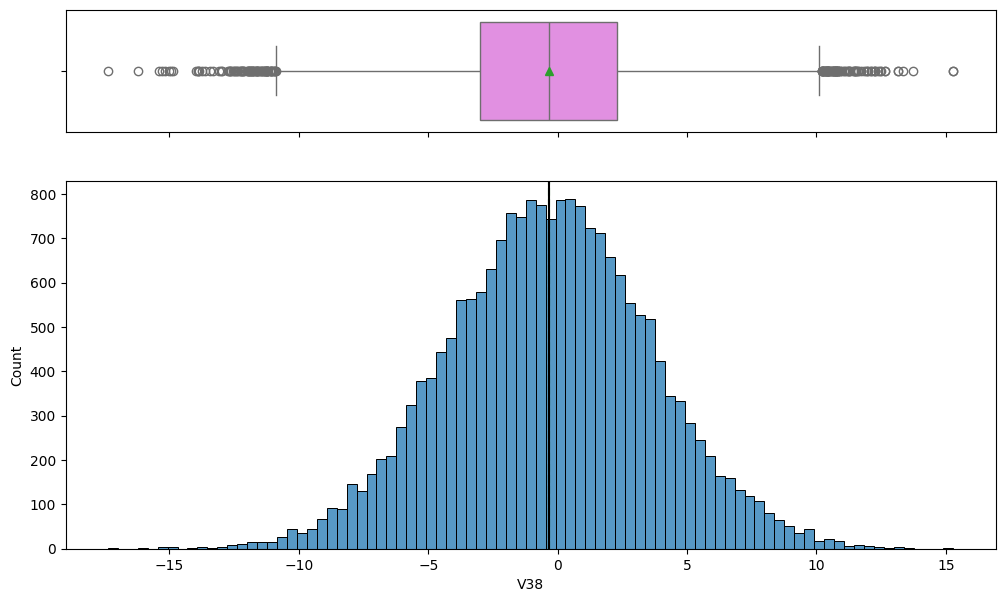

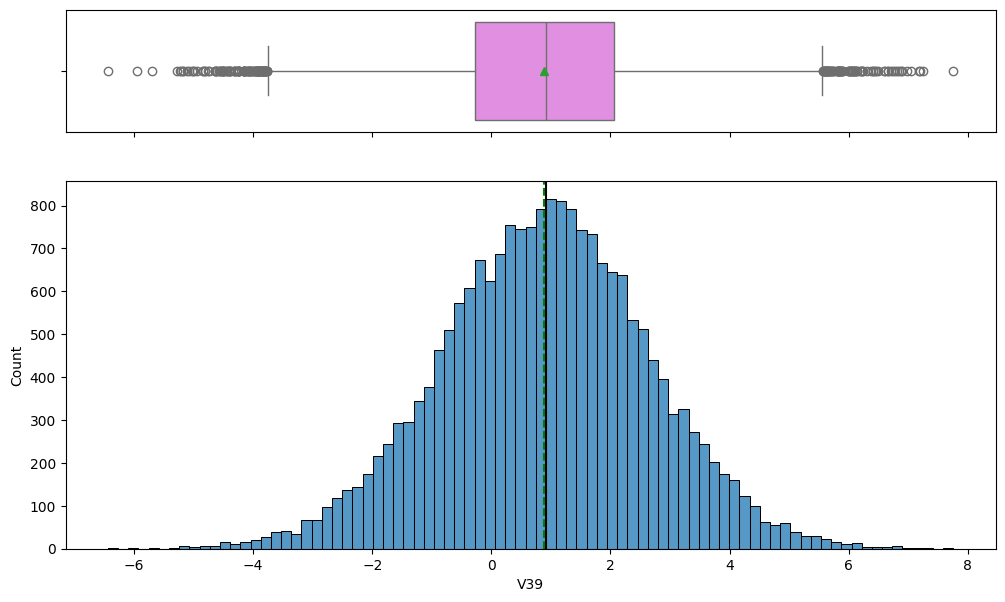

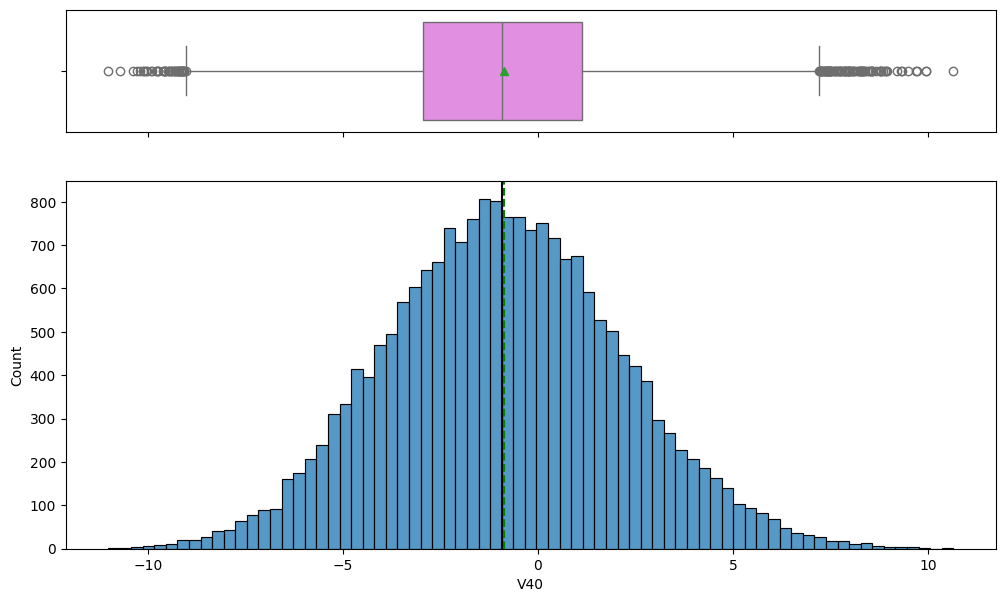

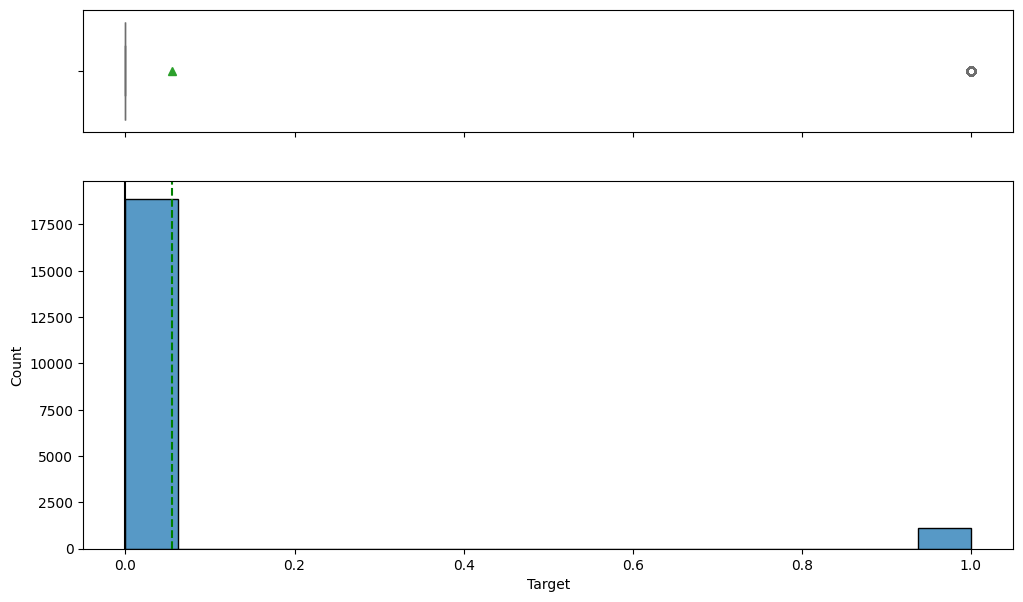

In [15]:
for feature in wind.columns:
    histogram_boxplot(wind, feature, figsize=(12, 7), kde=False, bins=None) 

>1.  All variables with the exception of the target are normally distribuited.
>2.  All variables with the exception of the target have outliers.
>3.  V1 and V37 have slight skewness to the right
>4.  V10, V22 and V30 have slight skewness to the left

## Bivariate and Multivariate Analysis

In [16]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [18]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [19]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

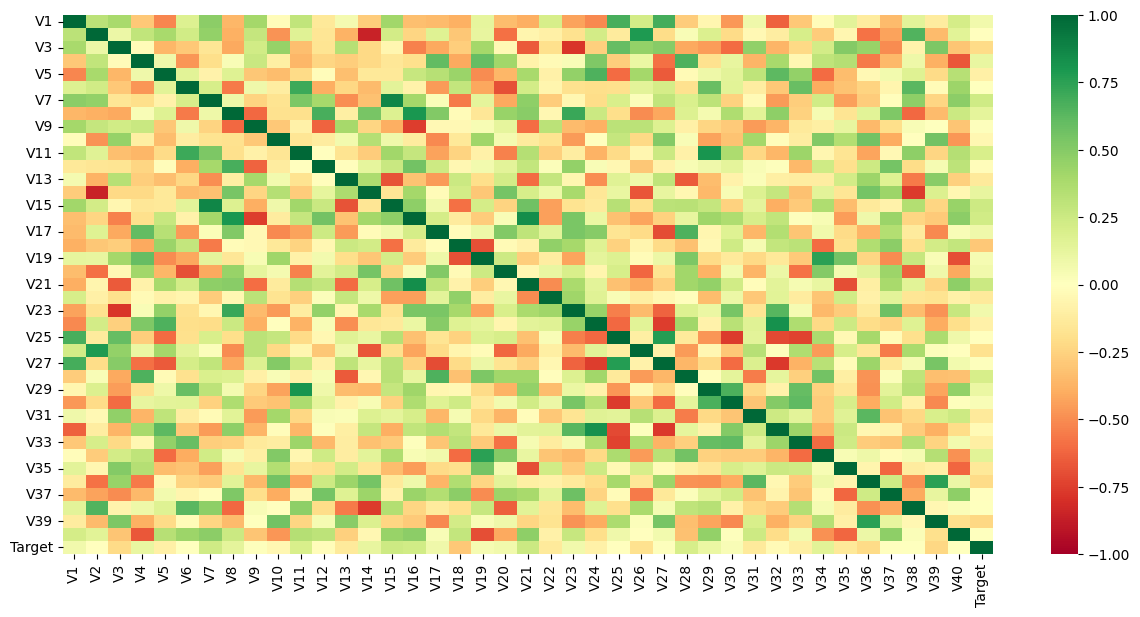

In [20]:
cols_list = wind.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 7))
sns.heatmap(
    wind[cols_list].corr(), annot=False, vmin=-1, vmax=1, fmt=".2f", cmap="RdYlGn"
)
plt.show()

> 1. There are many variables whcih are positively and negatively correlated.
> 2. We see that V2 with V4 have very high positive correlation
> 3. V15 and V7 have very high negative correlation.
> 4. Comparing correlations with the target, there are no strong correlations between the variables and the target variables.

<Figure size 1200x900 with 0 Axes>

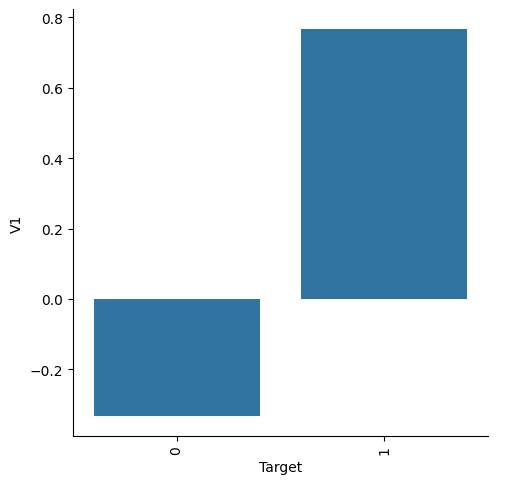

<Figure size 1200x900 with 0 Axes>

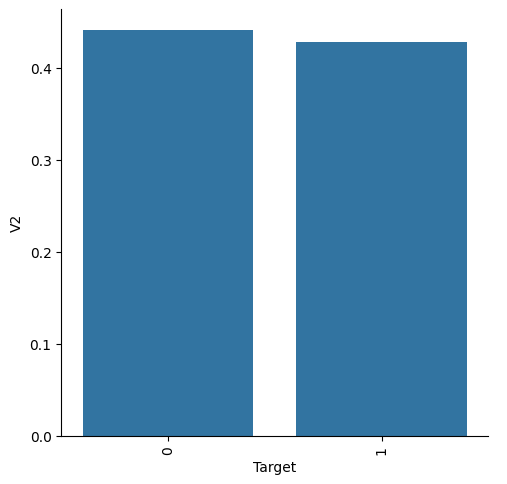

<Figure size 1200x900 with 0 Axes>

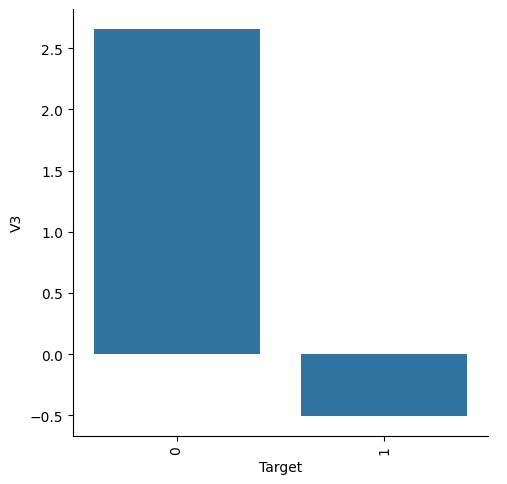

<Figure size 1200x900 with 0 Axes>

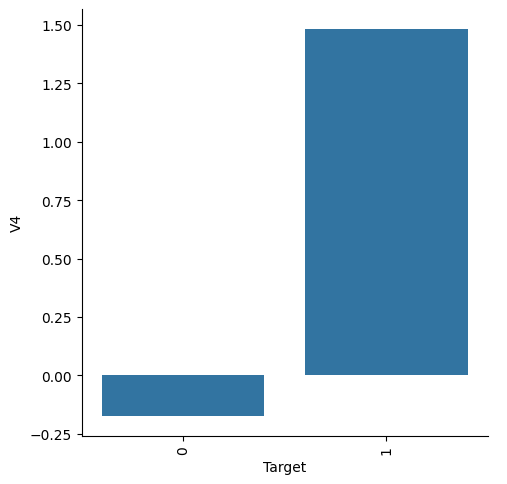

<Figure size 1200x900 with 0 Axes>

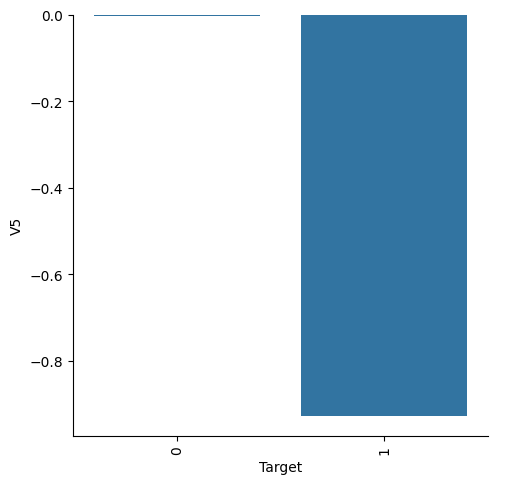

<Figure size 1200x900 with 0 Axes>

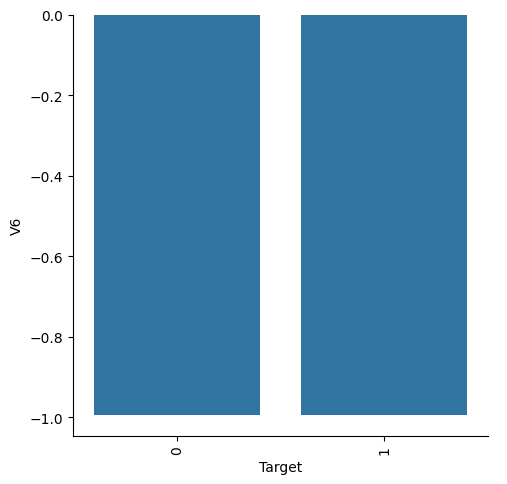

<Figure size 1200x900 with 0 Axes>

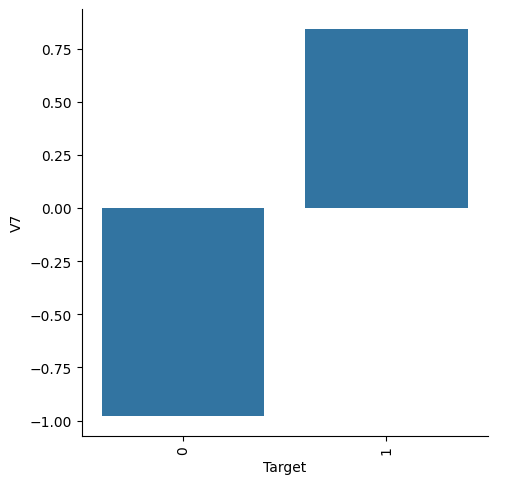

<Figure size 1200x900 with 0 Axes>

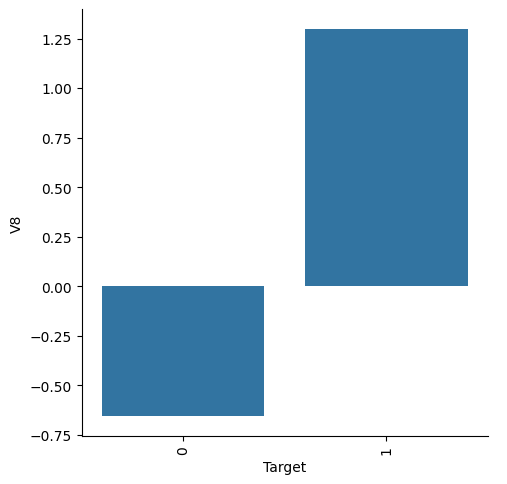

<Figure size 1200x900 with 0 Axes>

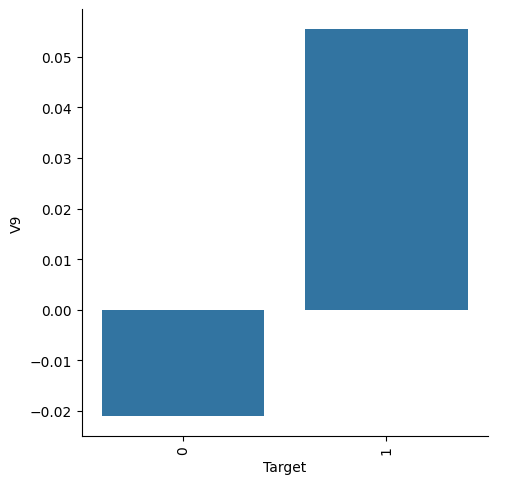

<Figure size 1200x900 with 0 Axes>

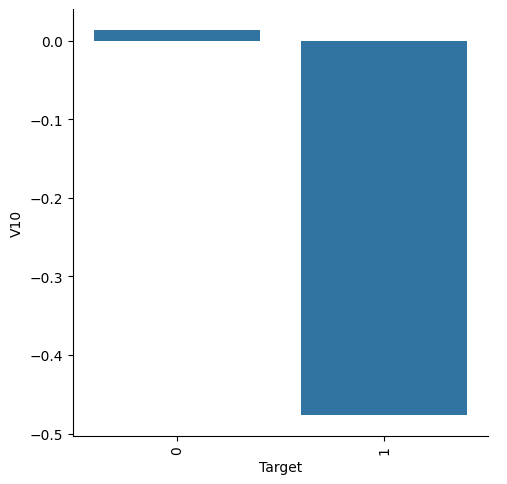

<Figure size 1200x900 with 0 Axes>

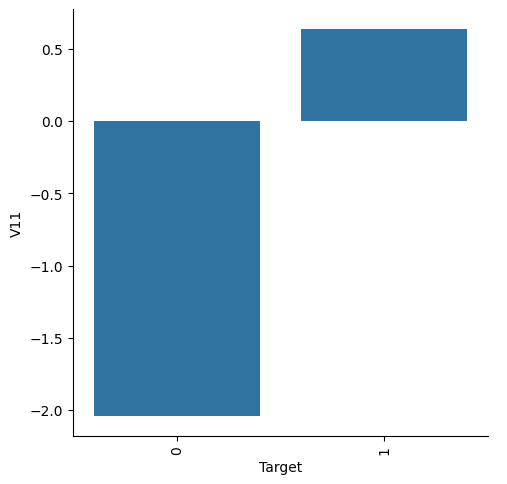

<Figure size 1200x900 with 0 Axes>

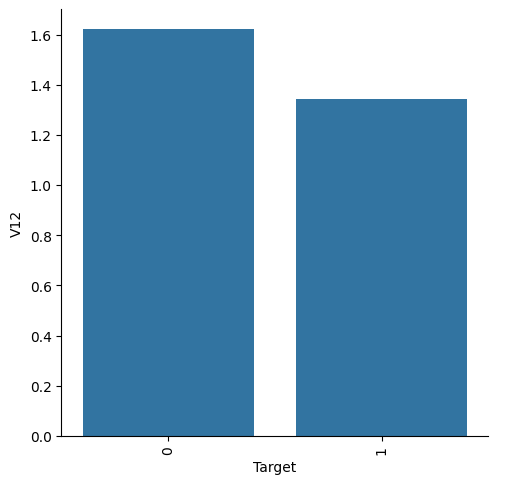

<Figure size 1200x900 with 0 Axes>

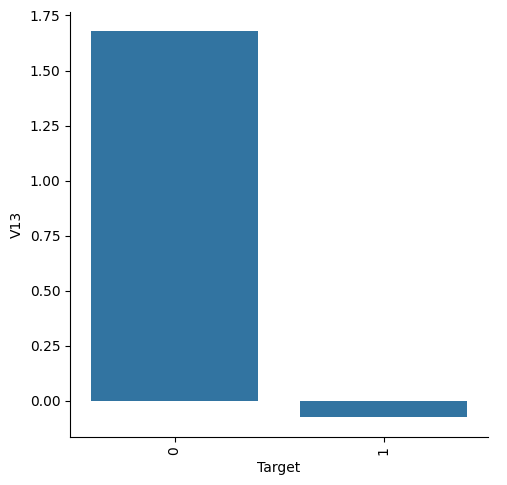

<Figure size 1200x900 with 0 Axes>

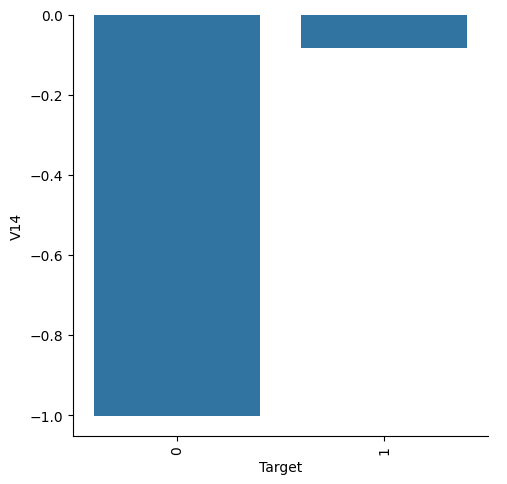

<Figure size 1200x900 with 0 Axes>

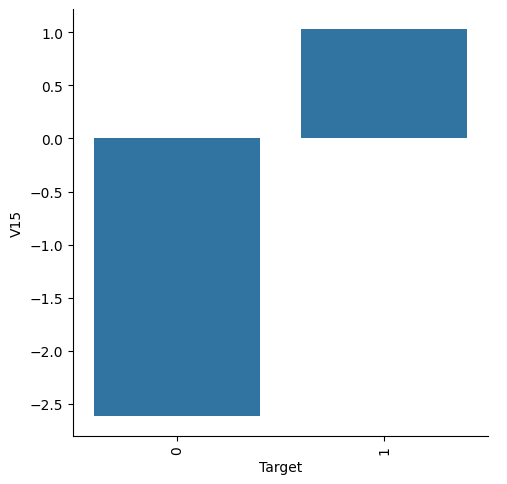

<Figure size 1200x900 with 0 Axes>

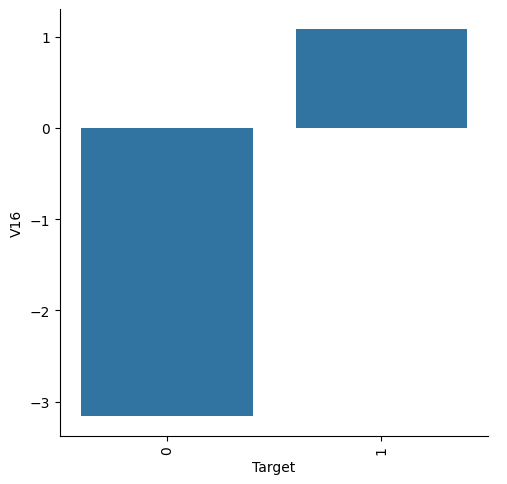

<Figure size 1200x900 with 0 Axes>

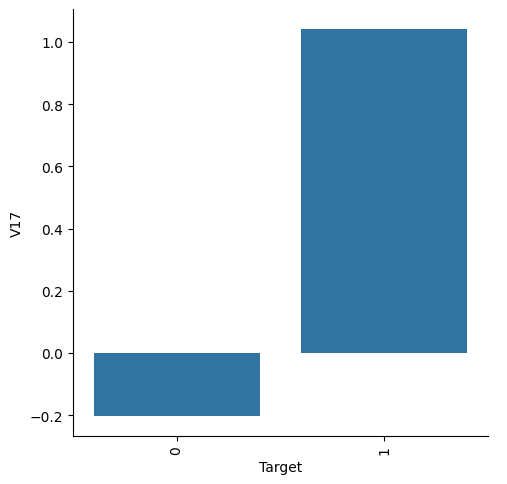

<Figure size 1200x900 with 0 Axes>

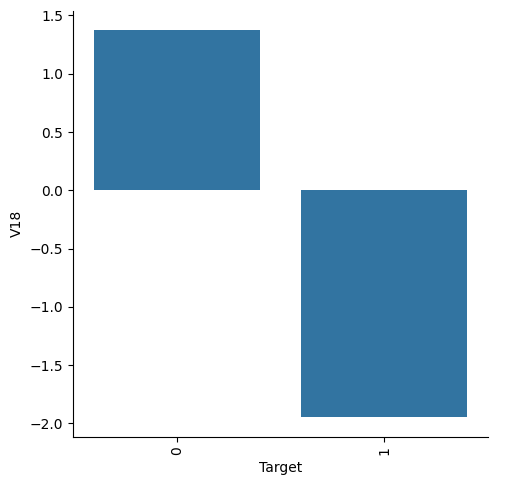

<Figure size 1200x900 with 0 Axes>

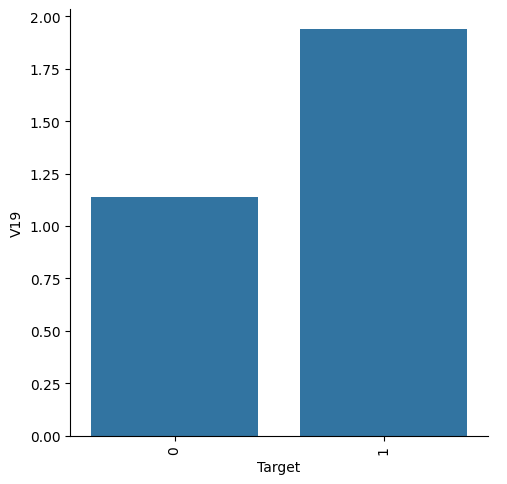

<Figure size 1200x900 with 0 Axes>

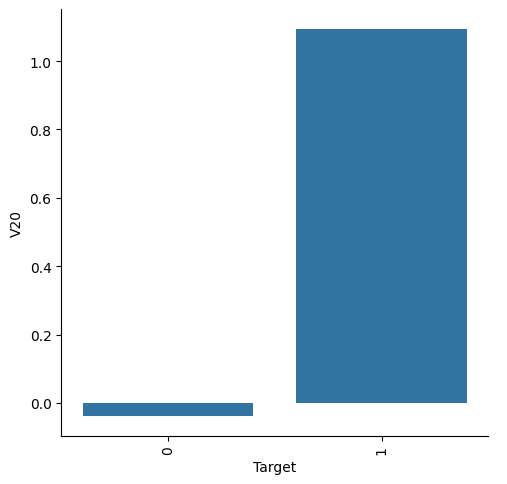

<Figure size 1200x900 with 0 Axes>

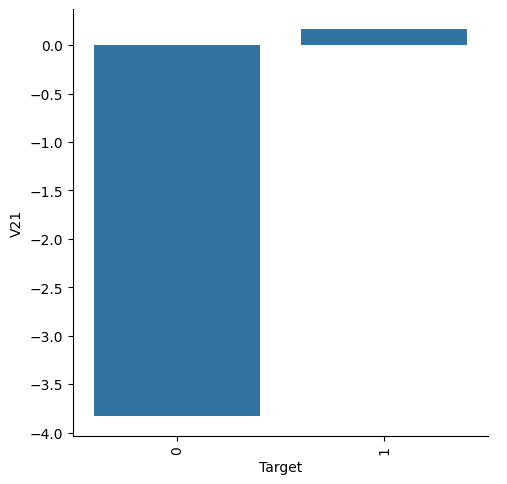

<Figure size 1200x900 with 0 Axes>

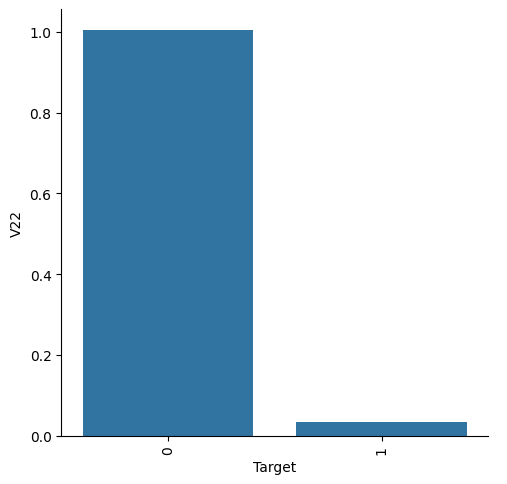

<Figure size 1200x900 with 0 Axes>

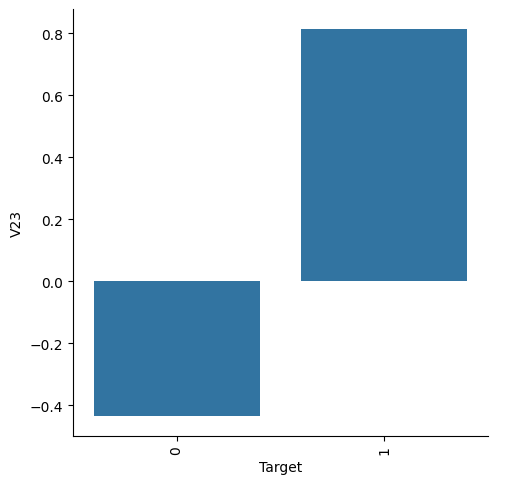

<Figure size 1200x900 with 0 Axes>

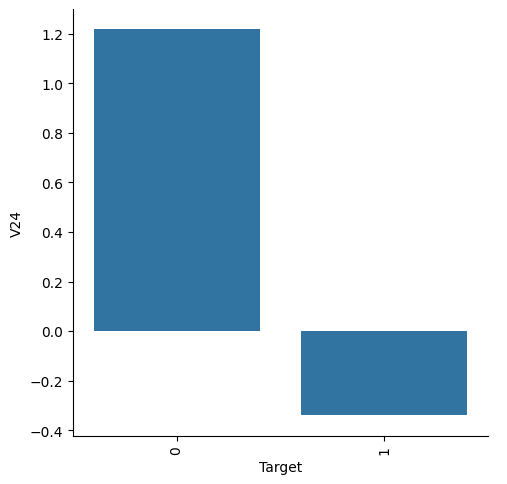

<Figure size 1200x900 with 0 Axes>

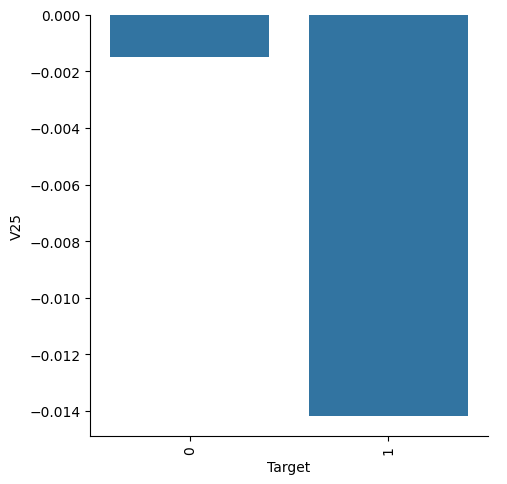

<Figure size 1200x900 with 0 Axes>

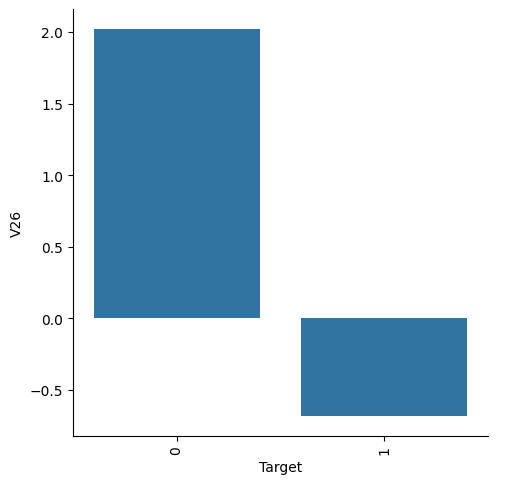

<Figure size 1200x900 with 0 Axes>

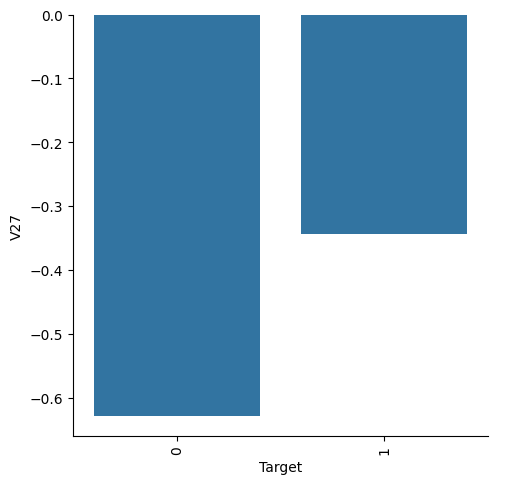

<Figure size 1200x900 with 0 Axes>

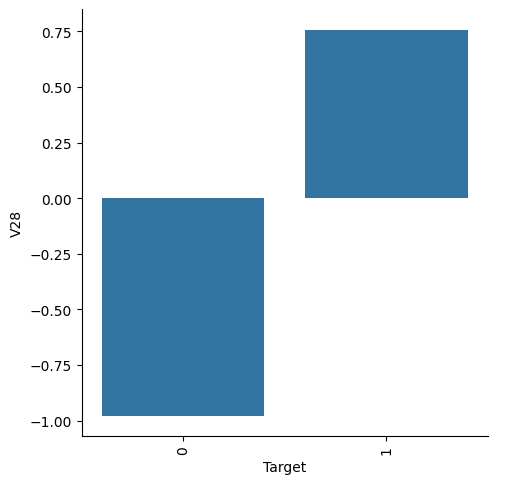

<Figure size 1200x900 with 0 Axes>

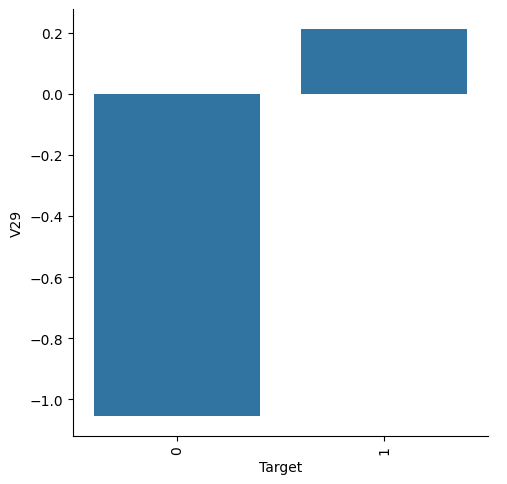

<Figure size 1200x900 with 0 Axes>

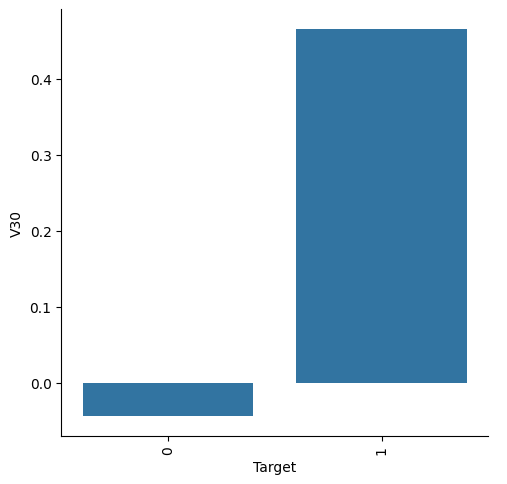

<Figure size 1200x900 with 0 Axes>

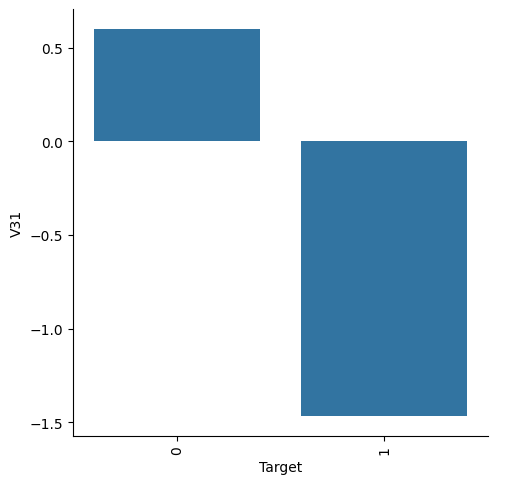

<Figure size 1200x900 with 0 Axes>

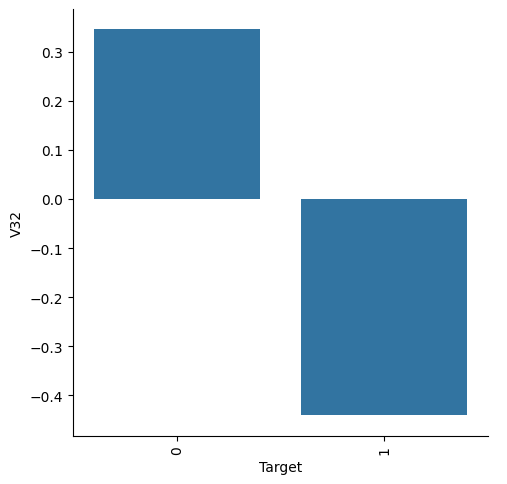

<Figure size 1200x900 with 0 Axes>

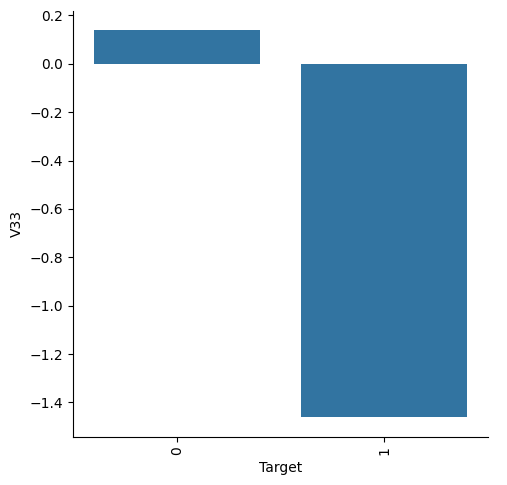

<Figure size 1200x900 with 0 Axes>

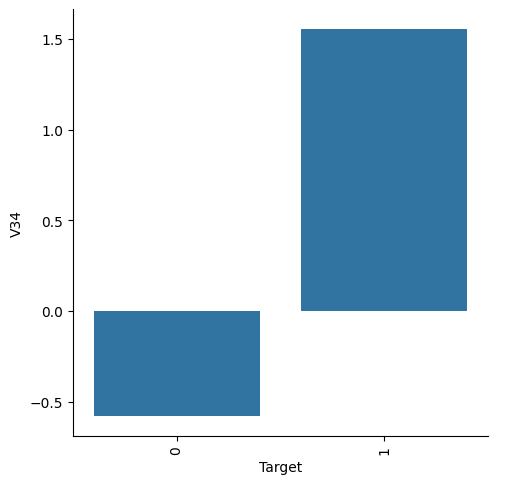

<Figure size 1200x900 with 0 Axes>

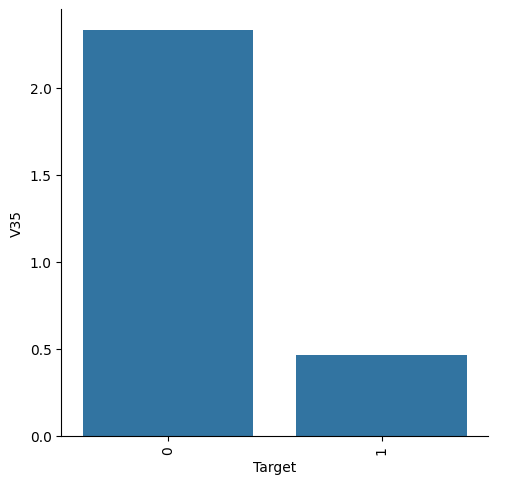

<Figure size 1200x900 with 0 Axes>

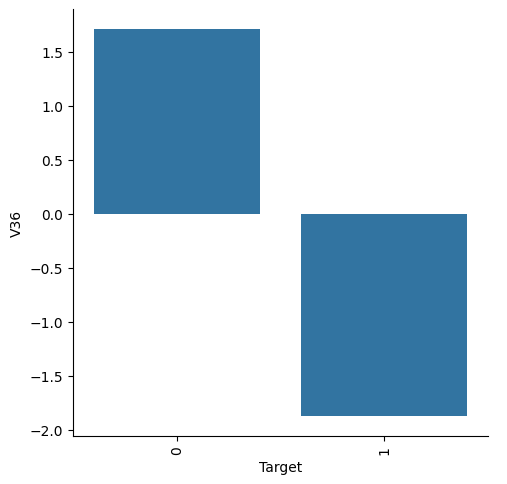

<Figure size 1200x900 with 0 Axes>

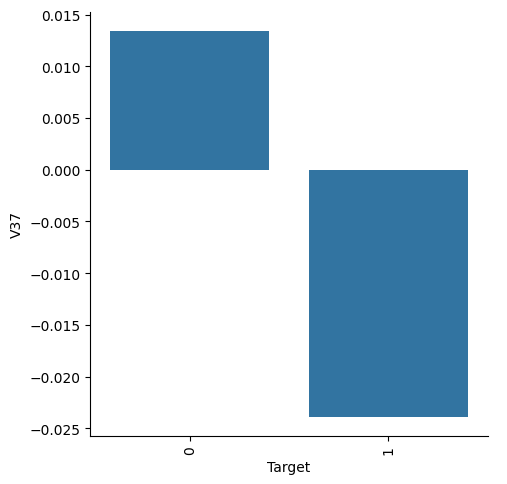

<Figure size 1200x900 with 0 Axes>

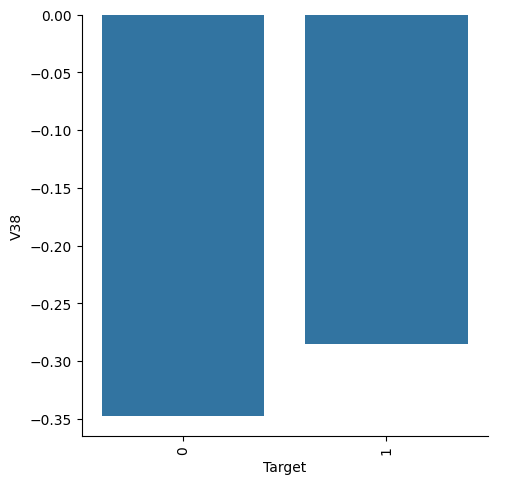

<Figure size 1200x900 with 0 Axes>

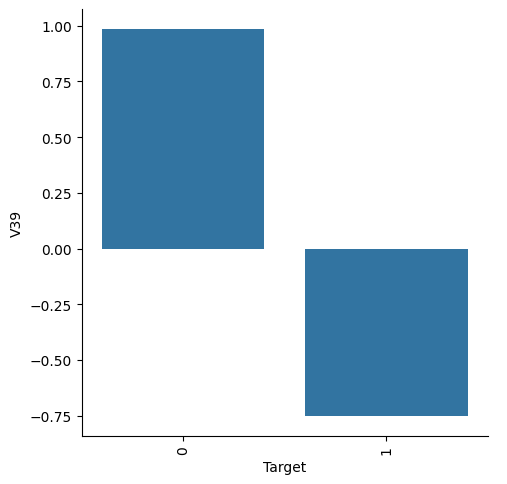

<Figure size 1200x900 with 0 Axes>

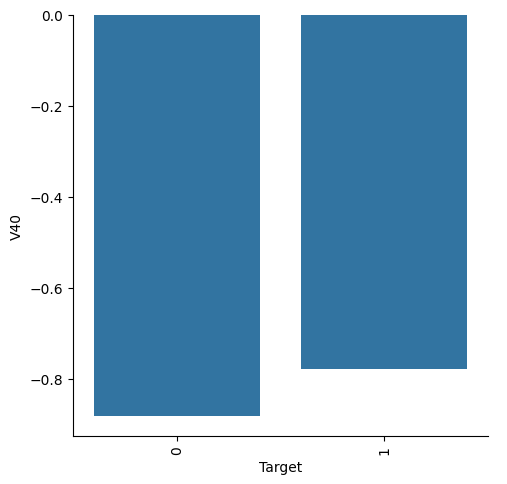

<Figure size 1200x900 with 0 Axes>

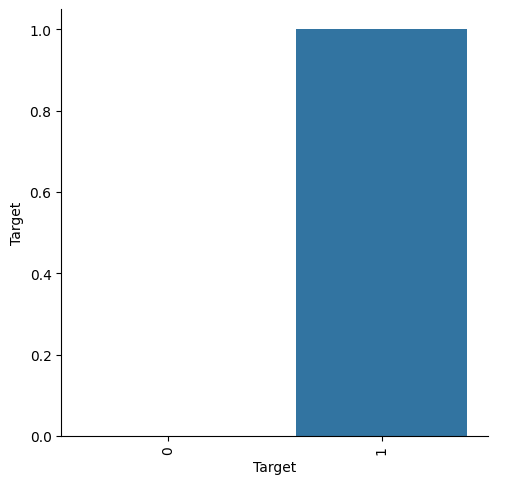

In [21]:
# loop to plot labeled_barplot for non-numeric variables
#non_num_cols = df.select_dtypes(exclude = np.number).columns
for col in wind.columns:
    plt.figure(figsize=(12,9))
    sns.catplot(data=wind,x = 'Target' , y = col, kind = "bar" ,ci = False); 
    plt.xticks( rotation=90);
    plt.show();

>1.  Some variables show a clear distinction between failure and non failure.
>2.  Variables seem to range from -1 to 1
>3.  For the following variables, a value of below 0 results in a non-failure and a value above 0 results in a failure: `V1`,`v4`, `V7`,`V8`, `V9`,`V11`, `V14`, `V15`, `V16`, `V17`, `V20`, `V21`, `V23`, `V28`, `V29`, `V230`, `V34`.
>4.  For the following variables, a value of below 0 results in a failure and a value above 0 results in a non-failure: `V3`, `V10`, `V13`, `V18`, `V24`, `V36`, `V31`, `V32`, `V33`, `V36`, `V37`, `V39`.
>5.  For `V5`, values beloew 0 results in a failure
>6.  For `V14`, values below 0 results in a non-failure.  For the remainder of vaules it is diffictult to determine if it will be a failure or non failure.
>7.  For `V22`, values above 0.05 results in a non-failure.  For the remainder of vaules it is diffictult to determine if it will be a failure or non failure.
>8.  For `V25`, values below -0.002 results in a non-failure.  For the remainder of vaules it is diffictult to determine if it will be a failure or non failure.
>9.  For `V27`, values below -0.35 results in a non-failure.  For the remainder of vaules it is diffictult to determine if it will be a failure or non failure.
>10.  For `V35`, values above 0.5 results in a non-failure.  For the remainder of vaules it is diffictult to determine if it will be a failure or non failure.
>11.  For `V28`, values below -0.30 results in a non-failure.  For the remainder of vaules it is diffictult to determine if it will be a failure or non failure.
>12.  VFor `V40`, values below -0.80 results in a non-failure.  For the remainder of vaules it is diffictult to determine if it will be a failure or non failure.

>  As we do not know what the variabes represent, further multivariate analysis would not be meaningful

## Data Pre-processing

**Note**: We will be imputing the missing values in the data after splitting into train and validation sets to avoid data leakage.  We will also impute missing values in the test data set.

### Data Preparation for Modelling

In [22]:
# Separating the target variable and other variables in the train dataset
X = wind.drop(columns="Target")
Y = wind["Target"]

In [23]:
# Separating the target variable and other variables in the test dataset
X_test = wind_test.drop(columns="Target")
Y_test = wind_test["Target"]

In [24]:
# Splitting training dataset into training and validation set:

X_train, X_val, y_train, y_val = train_test_split(
    X, Y, test_size=0.25, random_state=1, stratify=Y
)

In [25]:
# Checking the shape of the training and test data to ensure that they have the same distribution of 1's and 0's
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of Test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(Y_test.value_counts(normalize=True))

Shape of Training set :  (15000, 40)
Shape of Validation set :  (5000, 40)
Shape of Test set :  (5000, 40)
Percentage of classes in training set:
0    0.944533
1    0.055467
Name: Target, dtype: float64
Percentage of classes in validation set:
0    0.9444
1    0.0556
Name: Target, dtype: float64
Percentage of classes in test set:
0    0.9436
1    0.0564
Name: Target, dtype: float64


> The training dataset has been split into train and validation sets
> We see that the ratio of 1's and 0's have been maintained in training, validation and testing dataset

### Missing value imputation




In [26]:
imputer = SimpleImputer(strategy="median")

In [27]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

In [28]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------
V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22

>  We see there are no more missing values

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. Repair Cost.  
- False negatives (FN) are real failures in a generator where there is no detection by model.  Replacement Cost
- False positives (FP) are failure detections in a generator where there is no failure. Inspection Cost

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [29]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [30]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [31]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

>  We will use the following models: Logistic Regression, Decision Tree, Random Forest, Bagging, Gradient Boosting, AdaBoost and XGBoost

In [32]:
%%time 

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("logistic", LogisticRegression()))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))


results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

logistic: 0.4927566553639709
dtree: 0.6982829521679532
Random forest: 0.7235192266070268
Bagging: 0.7210807301060529
GBM: 0.7066661857008874
Adaboost: 0.6309140754635308
Xgboost: 0.8100497799581561

Validation Performance:

logistic: 0.48201438848920863
dtree: 0.7050359712230215
Random forest: 0.7266187050359713
Bagging: 0.7302158273381295
GBM: 0.7230215827338129
Adaboost: 0.6762589928057554
Xgboost: 0.8309352517985612
CPU times: total: 13min 16s
Wall time: 13min 3s


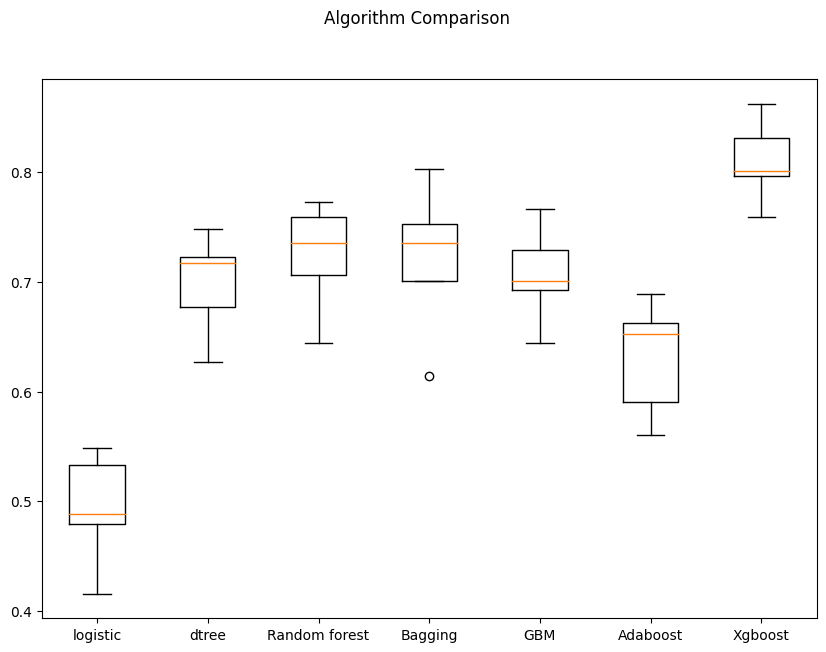

In [33]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

>  XGBoost, RandomForest and Bagging models are giving the highest cross validated recall scores.  Logistic regression, Adaboost and Decision tree are performing the worst in the cross validated recall scores
> XGBoost, Bagging and GBM are performing the best in the validation dataset.  The are generalizing well.
> Let us see if we can improve the models

### Model Building with Oversampled data


In [34]:
print("Before Oversampling, counts of Target Variable label '1': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of Target Variable label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of Target Variable label '1': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of Target Varible label '0': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of Target Variable label '1': 832
Before Oversampling, counts of Target Variable label '0': 14168 

After Oversampling, counts of Target Variable label '1': 14168
After Oversampling, counts of Target Varible label '0': 14168 

After Oversampling, the shape of train_X: (28336, 40)
After Oversampling, the shape of train_y: (28336,) 



> After we perform oversampling we see that the number of 1's have increased to the be equal to the number of 0's.  There are now 28,336 rows in the oversampled training datasets

In [35]:
%%time 

modelsOver = []  # Empty list to store all the models

# Appending models into the list
modelsOver.append(("logisticOver", LogisticRegression()))
modelsOver.append(("dtreeOver", DecisionTreeClassifier(random_state=1)))
modelsOver.append(("Random forestOver", RandomForestClassifier(random_state=1)))
modelsOver.append(("BaggingOver", BaggingClassifier(random_state=1)))
modelsOver.append(("GBMOver", GradientBoostingClassifier(random_state=1)))
modelsOver.append(("AdaboostOver", AdaBoostClassifier(random_state=1)))
modelsOver.append(("XgboostOver", XGBClassifier(random_state=1, eval_metric="logloss")))



# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on oversampled training dataset:" "\n")

for name, model in modelsOver:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in modelsOver:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on oversampled training dataset:

logisticOver: 0.883963699328486
dtreeOver: 0.9720494245534969
Random forestOver: 0.9839075260047615
BaggingOver: 0.9762141471581656
GBMOver: 0.925536218591203
AdaboostOver: 0.8978689011775473
XgboostOver: 0.9891305241357218

Validation Performance:

logisticOver: 0.8489208633093526
dtreeOver: 0.7769784172661871
Random forestOver: 0.8489208633093526
BaggingOver: 0.8345323741007195
GBMOver: 0.8776978417266187
AdaboostOver: 0.8561151079136691
XgboostOver: 0.8669064748201439
CPU times: total: 21min 15s
Wall time: 20min 42s


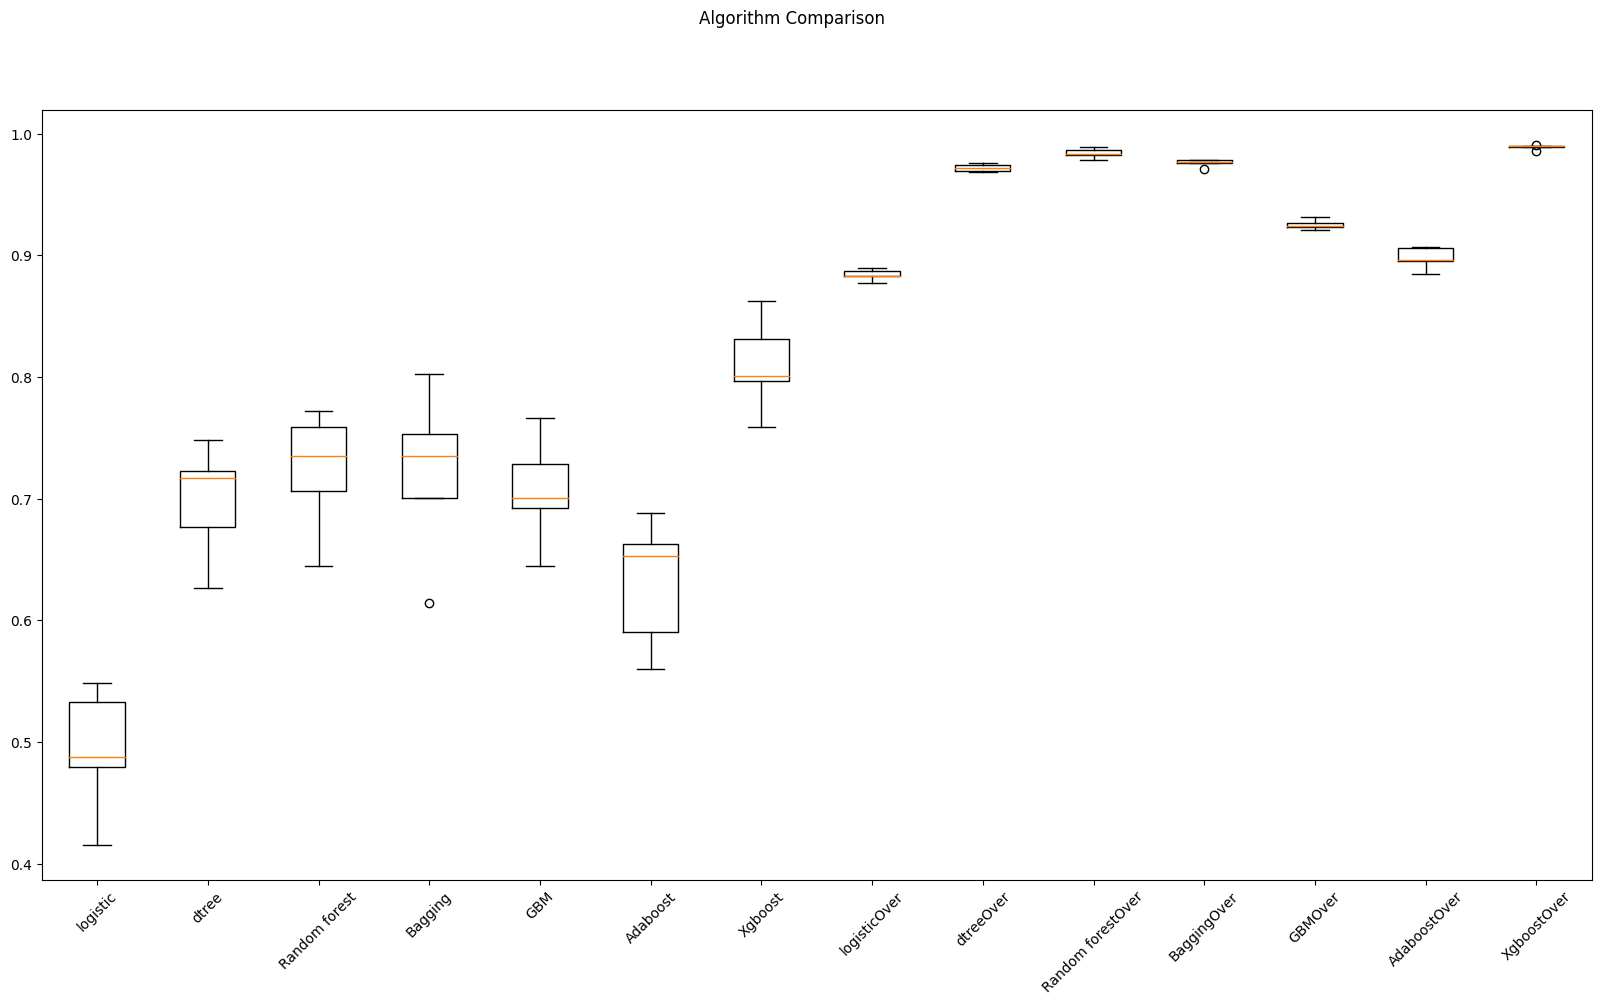

In [36]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(20, 10))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names, rotation = 45)

plt.show()

>  1. We see that the models with the oversampled data performs better than the models built using the original data set.
>  2. The models with the highest cross validation scores in the oversampled data is XGBoostOver, RandomForestOver and Bagging Over.
>  3. These models are overfitting in the validation data set

### Model Building with Undersampled data

In [37]:
print("Before Undersampling, counts of Target Variable label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of Target Variable label '0': {} \n".format(sum(y_train == 0)))


# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("After Undersampling, counts of Target Variable label '1': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of Target Varible label '0': {} \n".format(sum(y_train_un == 0)))


print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of Target Variable label '1': 832
Before Undersampling, counts of Target Variable label '0': 14168 

After Undersampling, counts of Target Variable label '1': 832
After Undersampling, counts of Target Varible label '0': 832 

After Undersampling, the shape of train_X: (1664, 40)
After Undersampling, the shape of train_y: (1664,) 



> After we perform undersampling we see that the number of 0's have decreased to the be equal to the number of 1's.  There are now 1664 rows in the undersampled training datasets

In [38]:
%%time 

modelsUn = []  # Empty list to store all the models

# Appending models into the list
modelsUn.append(("logisticUn", LogisticRegression()))
modelsUn.append(("dtreeUn", DecisionTreeClassifier(random_state=1)))
modelsUn.append(("Random forestUn", RandomForestClassifier(random_state=1)))
modelsUn.append(("BaggingUn", BaggingClassifier(random_state=1)))
modelsUn.append(("GBMUn", GradientBoostingClassifier(random_state=1)))
modelsUn.append(("AdaboostUn", AdaBoostClassifier(random_state=1)))
modelsUn.append(("XgboostUn", XGBClassifier(random_state=1, eval_metric="logloss")))



# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on undersampled training dataset:" "\n")

for name, model in modelsUn:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in modelsUn:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on undersampled training dataset:

logisticUn: 0.8726138085275232
dtreeUn: 0.8617776495202367
Random forestUn: 0.9038669648654498
BaggingUn: 0.8641945025611427
GBMUn: 0.8990621167303946
AdaboostUn: 0.8666113556020489
XgboostUn: 0.9014717552846114

Validation Performance:

logisticUn: 0.8525179856115108
dtreeUn: 0.841726618705036
Random forestUn: 0.8920863309352518
BaggingUn: 0.8705035971223022
GBMUn: 0.8884892086330936
AdaboostUn: 0.8489208633093526
XgboostUn: 0.89568345323741
CPU times: total: 1min 18s
Wall time: 1min 4s


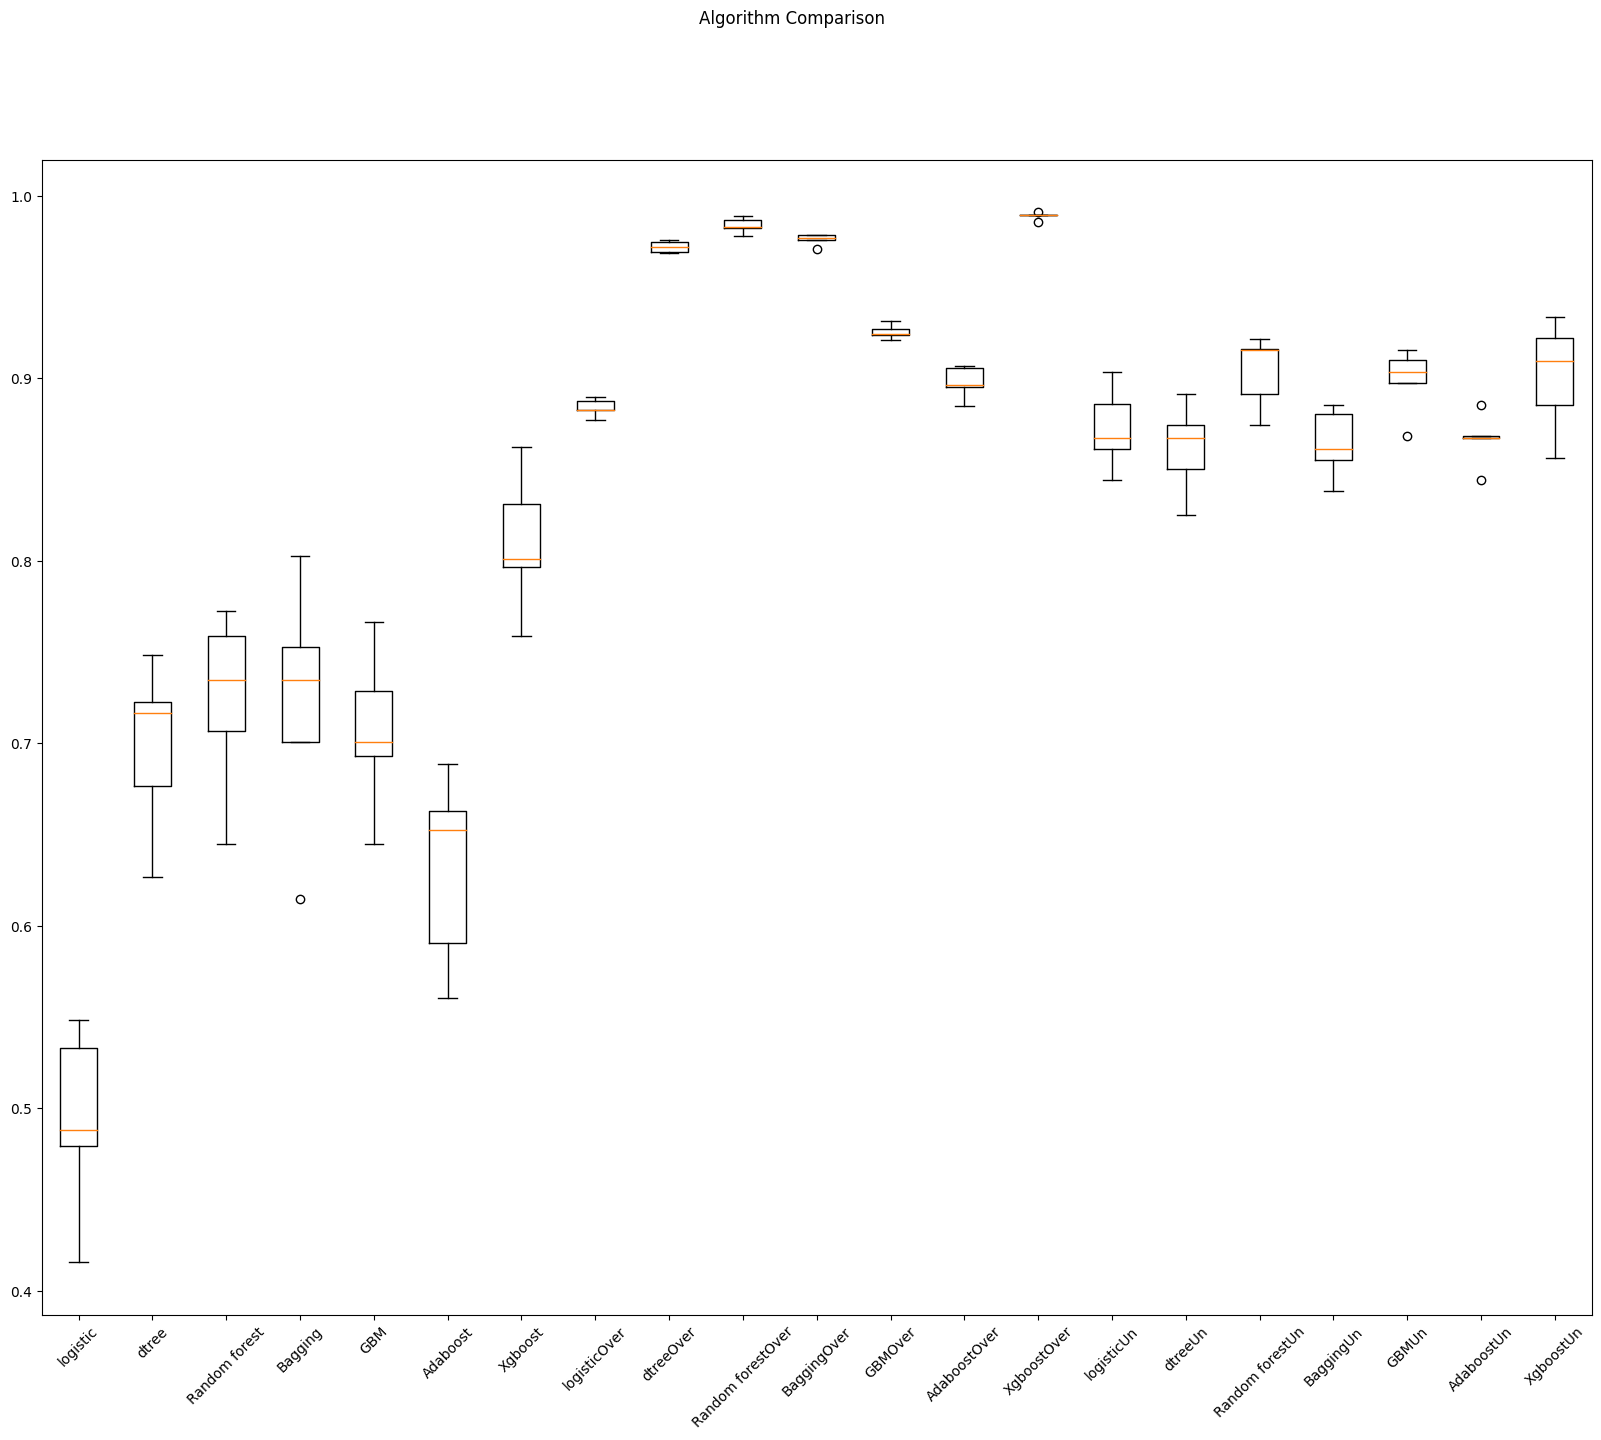

In [39]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(20, 15))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names, rotation = 45)

plt.show()

>  1. Comparing all models built using the original, oversampled and undersampled data, we see that the models with the highest cross validation scores are the oversampled data models.  The models built using the original data have the lowest cross validation scores.
>  2. We can also see that there is less overfitting in the models built in the unsampled datasets and the recall scores in the validation data set is comparable with the same in the oversampled dataset
>  3. In selecting the models to hypertune, we will look at both the cross validation scores on the training data and the recall scores in the validation data sets.  We will choose the models with the highest Recall scores in the validation set to hypertune:  XGBoost Undersample, Random Forest Undersample, Gradient Boost Undersample, AdaBoost Oversample and Gradient Boost Oversample

## HyperparameterTuning

**We will hypertune XGBoostUn, Random ForestUn and GBMUn, AdaoostOver, GBMOver models using RandomizedSearchCV and GridSearchCV.**

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Hypertuning XGBoost model with undersample data and RandomizedSearchCV

In [40]:
%%time

# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in RandomSearchCV
param_grid = {'n_estimators': [150, 200, 250], 
              'scale_pos_weight': [5,10], 
              'learning_rate': [0.1,0.2], 
              'gamma': [0,3,5], 
              'subsample': [0.8,0.9] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9290599523843879:
CPU times: total: 4.55 s
Wall time: 40 s


In [41]:
%%time

# building model with best parameters
XGBUn_tuned = XGBClassifier(
    subsample= 0.9, 
    scale_pos_weight= 10, 
    n_estimators= 200, 
    learning_rate= 0.1, 
    gamma= 5,
)

# Fit the model on undersampled training data
XGBUn_tuned.fit(X_train_un, y_train_un)

CPU times: total: 3.39 s
Wall time: 1.28 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
# Calculating different metrics on train set
XGBUn_random_trained = model_performance_classification_sklearn(
    XGBUn_tuned, X_train_un, y_train_un
)
print("Training performance:")
XGBUn_random_trained

Training performance:


,Accuracy,Recall,Precision,F1
0,0.972356,1.0,0.947608,0.973099


In [43]:
#Calculating different metrics on validation set
XGBUn_random_val = model_performance_classification_sklearn(XGBUn_tuned, X_val, y_val)
print("Validation performance:")
XGBUn_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.8234,0.917266,0.2287,0.366116


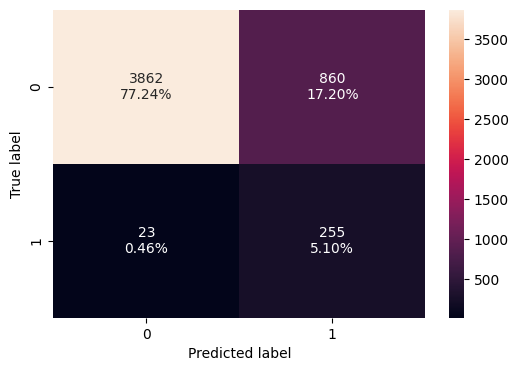

In [44]:
# creating confusion matrix
confusion_matrix_sklearn(XGBUn_tuned, X_val, y_val)

>1. The tuned XGBoost model with under sample data is performing good with a recall score of 0.92 in the validation dataset and a cross validation score of 0.85.
>2. The model is performing well at identifying failures.
>3. The model is performing well at incorrectly identifying failures (false positives)
>4. This model is overfitting

### Hypertuning XGBoost model with undersample data and GridSearchCV

In [45]:
%%time 

# defining model
Model = XGBClassifier(random_state=1, eval_metric="logloss")

# Parameter grid to pass in GridSearchCV

param_grid = {'n_estimators': [150, 200, 250], 
              'scale_pos_weight': [5,10], 
              'learning_rate': [0.1,0.2], 
              'gamma': [0,3,5], 
              'subsample': [0.8,0.9] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=Model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train_un, y_train_un)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'gamma': 5, 'learning_rate': 0.1, 'n_estimators': 150, 'scale_pos_weight': 10, 'subsample': 0.8} 
Score: 0.9302647716614963
CPU times: total: 7.95 s
Wall time: 3min 55s


In [46]:
%%time

# building model with best parameters
XGBUnGrid_tuned = XGBClassifier(
    subsample= 0.8, 
    scale_pos_weight= 10, 
    n_estimators= 150, 
    learning_rate= 0.1, 
    gamma= 5,
)

# Fit the model on undersampled training data
XGBUnGrid_tuned.fit(X_train_un, y_train_un)

CPU times: total: 2.66 s
Wall time: 1.32 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [47]:
# Calculating different metrics on train set
XGBUn_grid_trained = model_performance_classification_sklearn(
    XGBUnGrid_tuned, X_train_un, y_train_un
)
print("Training performance:")
XGBUn_grid_trained

Training performance:


,Accuracy,Recall,Precision,F1
0,0.977764,1.0,0.957422,0.978248


In [48]:
#Calculating different metrics on validation set
XGBUn_grid_val = model_performance_classification_sklearn(XGBUnGrid_tuned, X_val, y_val)
print("Validation performance:")
XGBUn_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.839,0.913669,0.245411,0.3869


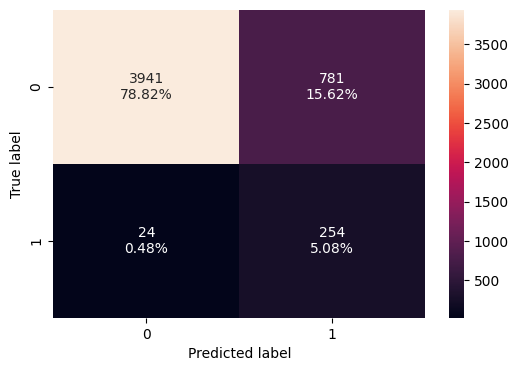

In [49]:
# creating confusion matrix
confusion_matrix_sklearn(XGBUnGrid_tuned, X_val, y_val)

>1.  The GridSearchCV gave slightly different hyperparamenter values compared to the RandomSearchCV, however is performing similar to the RandomSearchCV

### Hypertuning Random Forest model with undersample data and RandomizedSearchCV

In [50]:
%%time

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": [200,250,300], 
              "min_samples_leaf": np.arange(1, 4), 
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], 
              "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.8978140105331505:
CPU times: total: 5.02 s
Wall time: 1min 1s


In [51]:
%%time
# building model with best parameters
RandomForestUn_tuned = RandomForestClassifier(
    n_estimators= 250, 
    min_samples_leaf= 1, 
    max_samples= 0.6,
    max_features= 'sqrt'
)

# Fit the model on undersampled training data
RandomForestUn_tuned.fit(X_train_un, y_train_un)

CPU times: total: 4.8 s
Wall time: 4.98 s


RandomForestClassifier(max_samples=0.6, n_estimators=250)

In [52]:
# Calculating different metrics on train set
RandomForestUn_random_trained = model_performance_classification_sklearn(
    RandomForestUn_tuned, X_train_un, y_train_un
)
print("Training performance:")
RandomForestUn_random_trained

Training performance:


,Accuracy,Recall,Precision,F1
0,0.988582,0.978365,0.998773,0.988464


In [53]:
#Calculating different metrics on validation set
RandomForestUn_random_val = model_performance_classification_sklearn(RandomForestUn_tuned, X_val, y_val)
print("Validation performance:")
RandomForestUn_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.941,0.884892,0.483301,0.625159


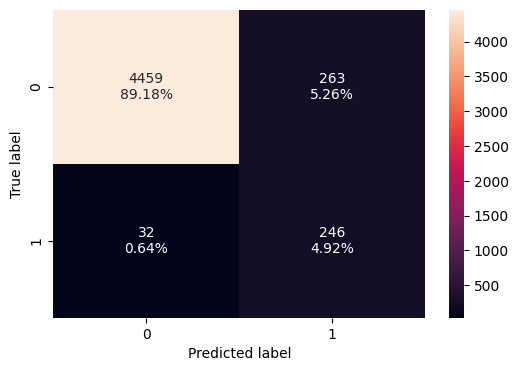

In [54]:
# creating confusion matrix
confusion_matrix_sklearn(RandomForestUn_tuned, X_val, y_val)

>1.  The RandomForest undersample with RandomizeSearchCV is overfitting in the validation dataset and is not performing as well as the XGBoost with Undersampled data.

### Hypertuning Random Forest model with undersample data and GridSearchCV

In [55]:
%%time

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": [200,250,300], 
              "min_samples_leaf": np.arange(1, 4), 
              "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], 
              "max_samples": np.arange(0.4, 0.7, 0.1) }

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=Model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train_un, y_train_un)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'max_features': 'sqrt', 'max_samples': 0.5, 'min_samples_leaf': 1, 'n_estimators': 250} 
Score: 0.8990188298102592
CPU times: total: 6.95 s
Wall time: 3min 8s


In [56]:
%%time
# building model with best parameters
RandomForestUnGrid_tuned = RandomForestClassifier(
    n_estimators= 250, 
    min_samples_leaf= 1, 
    max_samples= 0.5,
    max_features= 'sqrt'
)

# Fit the model on undersampled training data
RandomForestUnGrid_tuned.fit(X_train_un, y_train_un)

CPU times: total: 3.34 s
Wall time: 3.37 s


RandomForestClassifier(max_samples=0.5, n_estimators=250)

In [57]:
# Calculating different metrics on train set
RandomForestUn_grid_trained = model_performance_classification_sklearn(
    RandomForestUnGrid_tuned, X_train_un, y_train_un
)
print("Training performance:")
RandomForestUn_grid_trained

Training performance:


,Accuracy,Recall,Precision,F1
0,0.978365,0.957933,0.998747,0.977914


In [58]:
#Calculating different metrics on validation set
RandomForestUn_grid_val = model_performance_classification_sklearn(RandomForestUnGrid_tuned, X_val, y_val)
print("Validation performance:")
RandomForestUn_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.936,0.881295,0.460526,0.604938


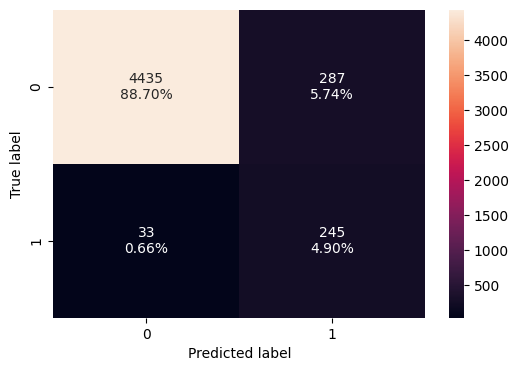

In [59]:
# creating confusion matrix
confusion_matrix_sklearn(RandomForestUnGrid_tuned, X_val, y_val)

>1  The GridSearchCV gave slightly different hyperparameter values compared to the RamdomizedSearchCV.  The randomizedSearchCV gave slightly better recall results in the validation dataset, but it is still overfitting

### Hypertuning Gradient Boost model with undersample data and RandomizedSearchCV

In [60]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": np.arange(100,150,25), 
              "learning_rate": [0.2, 0.05, 1], 
              "subsample":[0.5,0.7], 
              "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.8989827573768127:
CPU times: total: 3.92 s
Wall time: 56.5 s


In [61]:
%%time

# building model with best parameters
GBMUn_tuned = GradientBoostingClassifier(
    subsample= 0.7, 
    n_estimators= 125, 
    max_features= 0.5, 
    learning_rate= 0.2
)

# Fit the model on undersampled training data
GBMUn_tuned.fit(X_train_un, y_train_un)

CPU times: total: 3.69 s
Wall time: 3.74 s


GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, subsample=0.7)

In [62]:
# Calculating different metrics on train set
GBMUn_random_trained = model_performance_classification_sklearn(
    GBMUn_tuned, X_train_un, y_train_un
)
print("Training performance:")
GBMUn_random_trained

Training performance:


,Accuracy,Recall,Precision,F1
0,0.996995,0.99399,1.0,0.996986


In [63]:
#Calculating different metrics on validation set
GBMUn_random_val = model_performance_classification_sklearn(GBMUn_tuned, X_val, y_val)
print("Validation performance:")
GBMUn_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.929,0.888489,0.432574,0.581861


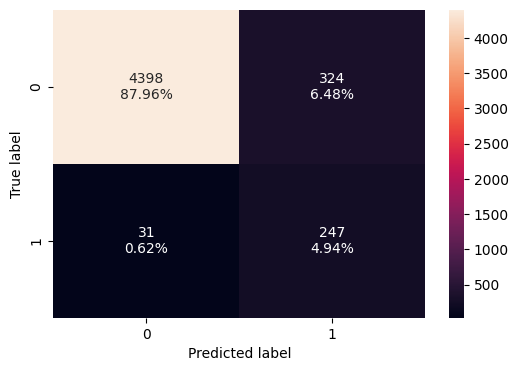

In [64]:
# creating confusion matrix
confusion_matrix_sklearn(GBMUn_tuned, X_val, y_val)

### Hypertuning Gradient Boost model with undersample data and GridSearchCV

In [65]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": np.arange(100,150,25), 
              "learning_rate": [0.2, 0.05, 1], 
              "subsample":[0.5,0.7], 
              "max_features":[0.5,0.7] }

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=Model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train_un, y_train_un)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'learning_rate': 0.2, 'max_features': 0.7, 'n_estimators': 125, 'subsample': 0.5} 
Score: 0.8990188298102589
CPU times: total: 5.14 s
Wall time: 2min 16s


In [66]:
%%time

# building model with best parameters
GBMUnGrid_tuned = GradientBoostingClassifier(
    subsample= 0.5, 
    n_estimators= 125, 
    max_features= 0.7, 
    learning_rate= 0.2
)

# Fit the model on undersampled training data
GBMUnGrid_tuned.fit(X_train_un, y_train_un)

CPU times: total: 3.61 s
Wall time: 3.62 s


GradientBoostingClassifier(learning_rate=0.2, max_features=0.7,
                           n_estimators=125, subsample=0.5)

In [67]:
# Calculating different metrics on train set
GBMUn_grid_trained = model_performance_classification_sklearn(
    GBMUnGrid_tuned, X_train_un, y_train_un
)
print("Training performance:")
GBMUn_grid_trained

Training performance:


,Accuracy,Recall,Precision,F1
0,0.992188,0.987981,0.996364,0.992154


In [68]:
#Calculating different metrics on validation set
GBMUn_grid_val = model_performance_classification_sklearn(GBMUnGrid_tuned, X_val, y_val)
print("Validation performance:")
GBMUn_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9112,0.874101,0.372699,0.522581


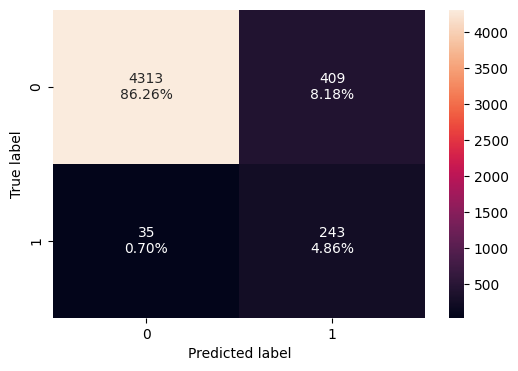

In [69]:
# creating confusion matrix
confusion_matrix_sklearn(GBMUnGrid_tuned, X_val, y_val)

>1.  The GridSearchCV gave slightly different hyperparameter values compared to the RandomizedSearchCV.  Like the previous models this model is also overfitting.

### Hypertuning Gradient Boost model with oversample data and RandomizedSearchCV

In [70]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": np.arange(100,150,25), 
              "learning_rate": [0.2, 0.05, 1], 
              "subsample":[0.5,0.7], 
              "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9736732944545844:
CPU times: total: 1min 10s
Wall time: 16min 52s


In [71]:
%%time
# building model with best parameters
GBMOver_tuned = GradientBoostingClassifier(
    subsample= 0.7, 
    n_estimators= 125, 
    max_features= 0.5, 
    learning_rate= 1
)

# Fit the model on undersampled training data
GBMOver_tuned.fit(X_train_over, y_train_over)

CPU times: total: 56.9 s
Wall time: 57.3 s


GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           subsample=0.7)

In [72]:
# Calculating different metrics on train set
GBMOver_random_trained = model_performance_classification_sklearn(
    GBMOver_tuned, X_train_over, y_train_over
)
print("Training performance:")
GBMOver_random_trained

Training performance:


,Accuracy,Recall,Precision,F1
0,0.994459,0.99393,0.994983,0.994456


In [73]:
#Calculating different metrics on validation set
GBMOver_random_val = model_performance_classification_sklearn(GBMOver_tuned, X_val, y_val)
print("Validation performance:")
GBMOver_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9662,0.845324,0.65097,0.735524


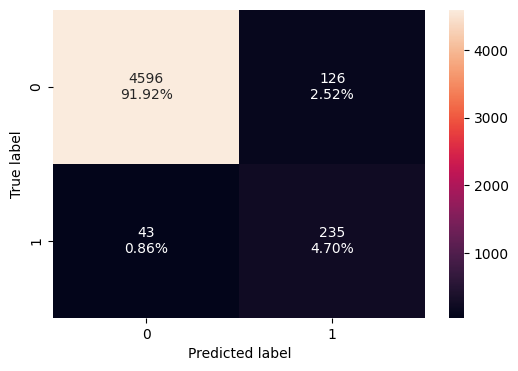

In [74]:
# creating confusion matrix
confusion_matrix_sklearn(GBMOver_tuned, X_val, y_val)

### Hypertuning Gradient Boost model with oversample data and GridSearchCV

In [75]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {"n_estimators": np.arange(100,150,25), 
              "learning_rate": [0.2, 0.05, 1], 
              "subsample":[0.5,0.7], 
              "max_features":[0.5,0.7] }

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=Model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train_un, y_train_un)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'learning_rate': 0.2, 'max_features': 0.7, 'n_estimators': 125, 'subsample': 0.5} 
Score: 0.8990188298102589
CPU times: total: 5 s
Wall time: 2min 16s


In [76]:
%%time
# building model with best parameters
GBMOverGrid_tuned = GradientBoostingClassifier(
    subsample= 0.5, 
    n_estimators= 125, 
    max_features= 0.7, 
    learning_rate= 0.2
)

# Fit the model on undersampled training data
GBMOverGrid_tuned.fit(X_train_over, y_train_over)

CPU times: total: 57.5 s
Wall time: 57.9 s


GradientBoostingClassifier(learning_rate=0.2, max_features=0.7,
                           n_estimators=125, subsample=0.5)

In [77]:
# Calculating different metrics on train set
GBMOver_grid_trained = model_performance_classification_sklearn(
    GBMOverGrid_tuned, X_train_over, y_train_over
)
print("Training performance:")
GBMOver_grid_trained

Training performance:


,Accuracy,Recall,Precision,F1
0,0.971414,0.956733,0.985675,0.970989


In [78]:
#Calculating different metrics on validation set
GBMOver_grid_val = model_performance_classification_sklearn(GBMOverGrid_tuned, X_val, y_val)
print("Validation performance:")
GBMOver_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9734,0.874101,0.71261,0.785137


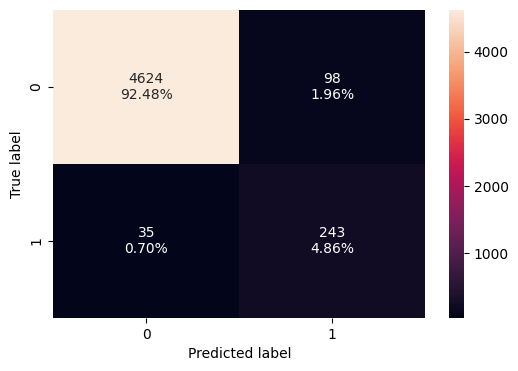

In [79]:
# creating confusion matrix
confusion_matrix_sklearn(GBMOverGrid_tuned, X_val, y_val)

>1.  The GridSearchCV gave slightly different hyperparameter values compared to the RandomizedSearchCV.  Like the previous models this model is also overfitting.

### Hypertuning  AdaBoost model with oversample data and RandomizedSearchCV

In [80]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200], 
    "learning_rate": [0.2, 0.05], 
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1), 
        DecisionTreeClassifier(max_depth=2, random_state=1), 
        DecisionTreeClassifier(max_depth=3, random_state=1), 
    ]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.971555946263926:
CPU times: total: 5min 18s
Wall time: 48min 29s


In [81]:
# building model with best parameters
AdaBoostOver_tuned = AdaBoostClassifier(
    n_estimators= 200, 
    learning_rate= 0.2, 
    base_estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
)

# Fit the model on undersampled training data
AdaBoostOver_tuned.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=200)

In [82]:
# Calculating different metrics on train set
AdaBoostOver_random_trained = model_performance_classification_sklearn(
    AdaBoostOver_tuned, X_train_over, y_train_over
)
print("Training performance:")
AdaBoostOver_random_trained 

Training performance:


,Accuracy,Recall,Precision,F1
0,0.991777,0.988283,0.995238,0.991748


In [83]:
#Calculating different metrics on validation set
AdaBoostOver_random_val = model_performance_classification_sklearn(AdaBoostOver_tuned, X_val, y_val)
print("Validation performance:")
AdaBoostOver_random_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9792,0.852518,0.79,0.820069


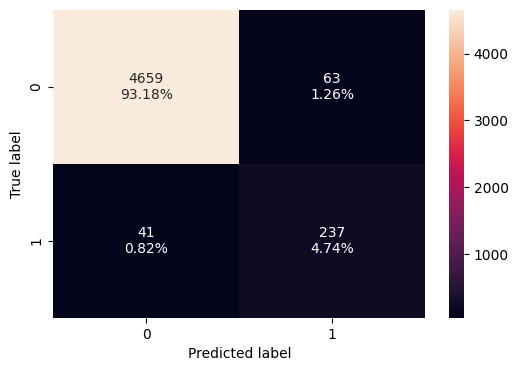

In [84]:
# creating confusion matrix
confusion_matrix_sklearn(AdaBoostOver_tuned, X_val, y_val)

### Hypertuning  AdaBoost model with oversample data and GridSearchCV

In [85]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [100, 150, 200], 
    "learning_rate": [0.2, 0.05], 
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1), 
        DecisionTreeClassifier(max_depth=2, random_state=1), 
        DecisionTreeClassifier(max_depth=3, random_state=1), 
    ]}

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=Model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSearchCV
grid_cv.fit(X_train_un, y_train_un)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'learning_rate': 0.05, 'n_estimators': 200} 
Score: 0.8906283817906356
CPU times: total: 15.9 s
Wall time: 4min 59s


In [86]:
# building model with best parameters
AdaBoostOverGrid_tuned = AdaBoostClassifier(
    n_estimators= 200, 
    learning_rate= 0.05, 
    base_estimator= DecisionTreeClassifier(max_depth=2, random_state=1)
)

# Fit the model on undersampled training data
AdaBoostOverGrid_tuned.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=200)

In [87]:
# Calculating different metrics on train set
AdaBoostOver_grid_trained = model_performance_classification_sklearn(
    AdaBoostOverGrid_tuned, X_train_over, y_train_over
)
print("Training performance:")
AdaBoostOver_grid_trained 

Training performance:


,Accuracy,Recall,Precision,F1
0,0.934853,0.914032,0.953749,0.933468


In [88]:
#Calculating different metrics on validation set
AdaBoostOver_grid_val = model_performance_classification_sklearn(AdaBoostOverGrid_tuned, X_val, y_val)
print("Validation performance:")
AdaBoostOver_grid_val

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9404,0.866906,0.48008,0.617949


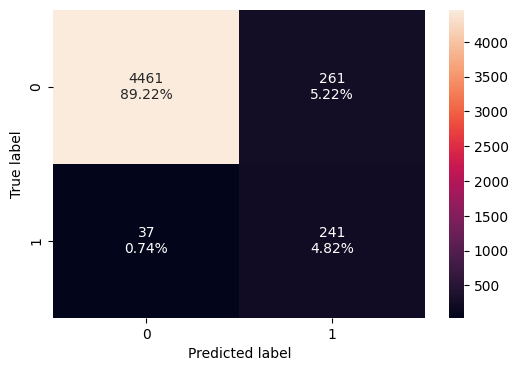

In [89]:
# creating confusion matrix
confusion_matrix_sklearn(AdaBoostOverGrid_tuned, X_val, y_val)

1.  Unlike previous models, the Adaboost GridSearchCV using Oversampled data is generalizing well and is not overfitting.  This model has false positive detections 0.74% of the times.  The recall score is 0.8669 in the validation dataset.

### Logistic Regression Regularization using Lasso Regression on oversample data

**We will try to improve the logistic regression oversampled data by performing regularization.**

In [90]:
##time
# Choose the type of classifier.
lr_estimator_lasso = LogisticRegression(random_state=1, penalty = 'l1', solver="saga")

# Grid of parameters to choose from
parameters = {"C": np.arange(0.1, 1.1, 0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator_lasso, parameters, scoring="recall")
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator_lasso = grid_obj.best_estimator_

# Fit the best algorithm to the data.
lr_estimator_lasso.fit(X_train_over, y_train_over)

LogisticRegression(C=0.2, penalty='l1', random_state=1, solver='saga')

In [91]:
# Calculating different metrics on train set
log_reg_reg_lasso_train_perf = model_performance_classification_sklearn(
    lr_estimator_lasso, X_train_over, y_train_over
)
print("Training performance:")
log_reg_reg_lasso_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.880294,0.883893,0.877575,0.880723


In [92]:
# Calculating different metrics on validation set
log_reg_reg_lasso_val_perf = model_performance_classification_sklearn(
    lr_estimator_lasso, X_val, y_val
)
print("Validation performance:")
log_reg_reg_lasso_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.8684,0.848921,0.276995,0.417699


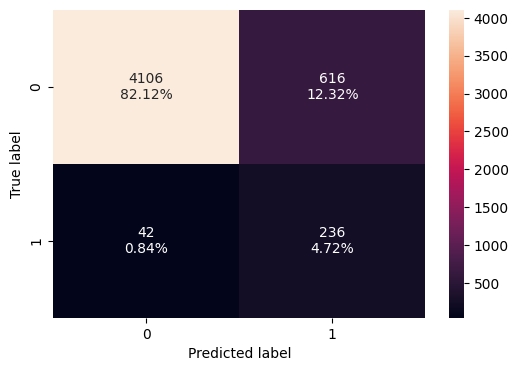

In [93]:
# creating confusion matrix
confusion_matrix_sklearn(lr_estimator_lasso, X_val, y_val)

### Logistic Regression Regularization using Ridge Regression on oversample data

In [94]:
##time
# Choose the type of classifier.
lr_estimator_ridge = LogisticRegression(random_state=1, penalty = "l2", solver="saga")

# Grid of parameters to choose from
parameters = {"C": np.arange(0.1, 1.1, 0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator_ridge, parameters, scoring="recall")
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator_ridge = grid_obj.best_estimator_

# Fit the best algorithm to the data.
lr_estimator_ridge.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

In [95]:
# Calculating different metrics on train set
log_reg_reg_ridge_train_perf = model_performance_classification_sklearn(
    lr_estimator_ridge, X_train_over, y_train_over
)
print("Training performance:")
log_reg_reg_ridge_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.880364,0.883964,0.877645,0.880793


In [96]:
# Calculating different metrics on validation set
log_reg_reg_ridge_val_perf = model_performance_classification_sklearn(
    lr_estimator_ridge, X_val, y_val
)
print("Validation performance:")
log_reg_reg_ridge_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.8684,0.848921,0.276995,0.417699


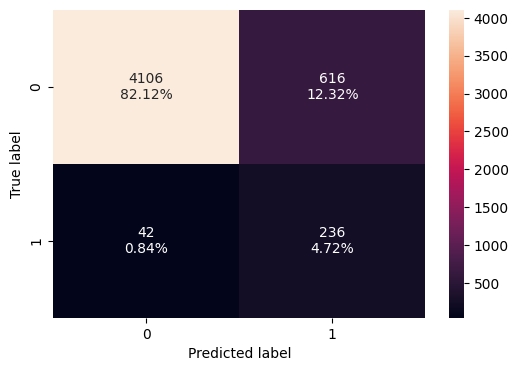

In [97]:
# creating confusion matrix
confusion_matrix_sklearn(lr_estimator_ridge, X_val, y_val)

>1.  The regularized logistic regression on the oversampled data is performing well and is not overfitting, however the AdaBoost Oversample GridSearchCV is giving better recall scores. 

## Model performance comparison and choosing the final model

In [98]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
    #    log_reg_reg_lasso_train_perf,
    #    log_reg_reg_ridge_train_perf,
        XGBUn_random_trained.T,
        RandomForestUn_random_trained.T,
        GBMUn_random_trained.T,
        GBMOver_random_trained.T,
        AdaBoostOver_random_trained.T,
        XGBUn_grid_trained.T,
        RandomForestUn_grid_trained.T,
        GBMUn_grid_trained.T,
        GBMOver_grid_trained.T,
        AdaBoostOver_grid_trained.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
 #   "Logistic Regression Oversample Lasso",
 #   "Logistic Regression Oversample Ridge",
    "XGBoost Undersampled Tuned Random",
    "Random Forest Undersampled Tuned Random",
    "Gradient Boosting UndersampledTuned Random",
    "Gradient Boosting Oversampled Tuned Random",
    "AdaBoost Oversampled Tuned Random",
    "XGBoost Undersampled Tuned Grid",
    "Random Forest Undersampled Tuned Grid",
    "Gradient Boosting UndersampledTuned Grid",
    "Gradient Boosting Oversampled Tuned Grid",
    "AdaBoost Oversampled Tuned Grid",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,XGBoost Undersampled Tuned Random,Random Forest Undersampled Tuned Random,Gradient Boosting UndersampledTuned Random,Gradient Boosting Oversampled Tuned Random,AdaBoost Oversampled Tuned Random,XGBoost Undersampled Tuned Grid,Random Forest Undersampled Tuned Grid,Gradient Boosting UndersampledTuned Grid,Gradient Boosting Oversampled Tuned Grid,AdaBoost Oversampled Tuned Grid
Accuracy,0.972356,0.988582,0.996995,0.994459,0.991777,0.977764,0.978365,0.992188,0.971414,0.934853
Recall,1.000000,0.978365,0.993990,0.993930,0.988283,1.000000,0.957933,0.987981,0.956733,0.914032
Precision,0.947608,0.998773,1.000000,0.994983,0.995238,0.957422,0.998747,0.996364,0.985675,0.953749
F1,0.973099,0.988464,0.996986,0.994456,0.991748,0.978248,0.977914,0.992154,0.970989,0.933468


In [99]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
  #     log_reg_reg_lasso_val_perf,
   #     log_reg_reg_ridge_val_perf,
        XGBUn_random_val.T,
        RandomForestUn_random_val.T,
        GBMUn_random_val.T,
        GBMOver_random_val.T,
        AdaBoostOver_random_val.T,
        XGBUn_grid_val.T,
        RandomForestUn_grid_val.T,
        GBMUn_grid_val.T,
        GBMOver_grid_val.T,
        AdaBoostOver_grid_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
#    "Logistic Regression Oversample Lasso",
 #   "Logistic Regression Oversample Ridge",
    "XGBoost Undersampled Tuned Random",
    "Random Forest Undersampled Tuned Random",
    "Gradient Boosting UndersampledTuned Random",
    "Gradient Boosting Oversampled Tuned Random",
    "AdaBoost Oversampled Tuned Random",
    "XGBoost Undersampled Tuned Grid",
    "Random Forest Undersampled Tuned Grid",
    "Gradient Boosting UndersampledTuned Grid",
    "Gradient Boosting Oversampled Tuned Grid",
    "AdaBoost Oversampled Tuned Grid",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,XGBoost Undersampled Tuned Random,Random Forest Undersampled Tuned Random,Gradient Boosting UndersampledTuned Random,Gradient Boosting Oversampled Tuned Random,AdaBoost Oversampled Tuned Random,XGBoost Undersampled Tuned Grid,Random Forest Undersampled Tuned Grid,Gradient Boosting UndersampledTuned Grid,Gradient Boosting Oversampled Tuned Grid,AdaBoost Oversampled Tuned Grid
Accuracy,0.823400,0.941000,0.929000,0.966200,0.979200,0.839000,0.936000,0.911200,0.973400,0.940400
Recall,0.917266,0.884892,0.888489,0.845324,0.852518,0.913669,0.881295,0.874101,0.874101,0.866906
Precision,0.228700,0.483301,0.432574,0.650970,0.790000,0.245411,0.460526,0.372699,0.712610,0.480080
F1,0.366116,0.625159,0.581861,0.735524,0.820069,0.386900,0.604938,0.522581,0.785137,0.617949


> Comparing all models AdaBoost Oversampled tuned with gridSearch is not overfitting the validation dataset and is giving good Recall scores.  This model is generalizing well.  We will choose this model for our test data.

### Test set final performance

In [100]:
# Calculating different metrics on the test set
ada_grid_test = model_performance_classification_sklearn(AdaBoostOverGrid_tuned, X_test, Y_test)
print("Test performance:")
ada_grid_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.9416,0.85461,0.489837,0.622739


>1.  On the test data the AdaBoost Oversampled GridsearchCV model is generalizing well and is not overfitting.  

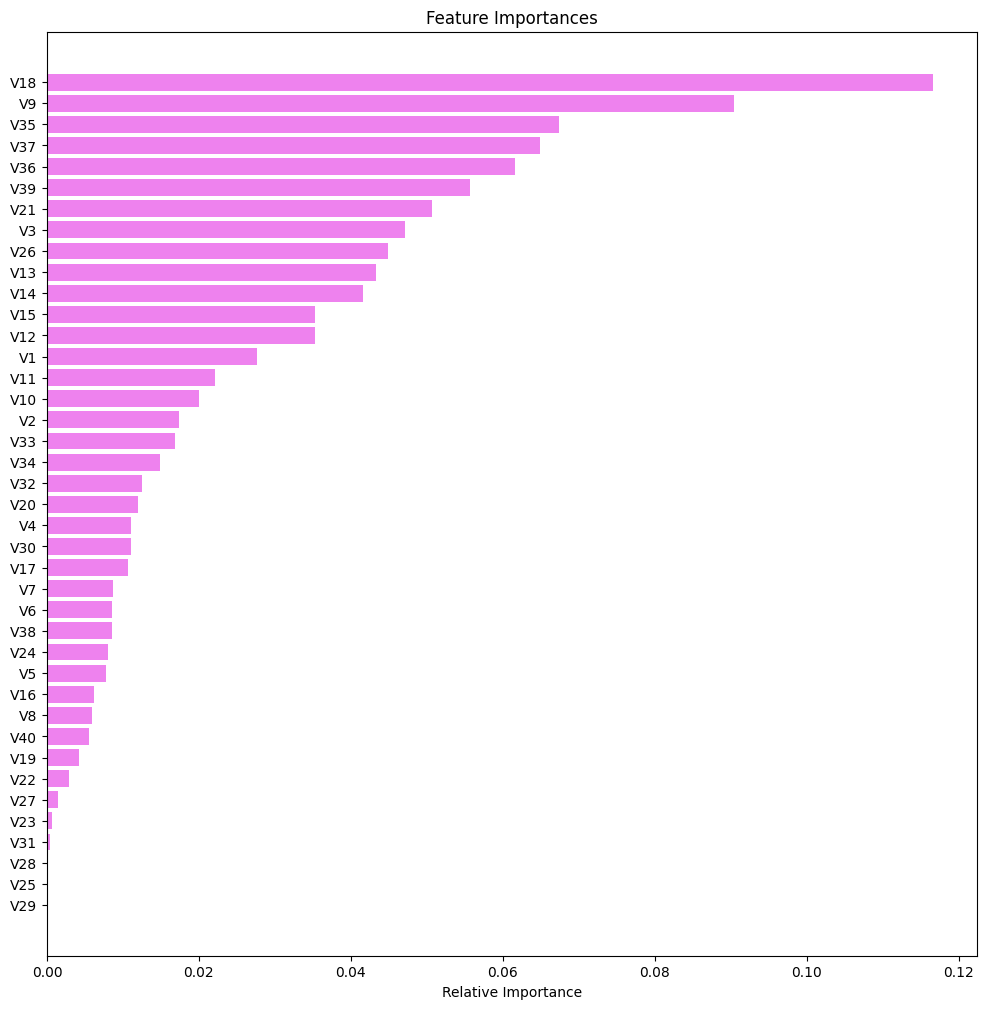

In [101]:
feature_names = X.columns
importances = AdaBoostOverGrid_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

>1.  The top 5 variables which are most important to the model are `V18`, `V9`, `V35`, `V37` and `V36`.
>2.  The 5 variables which are least important to the model are `V29`, `V25`, `V28`, `V31` and `V23`.

## Pipelines to build the final model


Now that we have a final model, let's use pipelines to put the model into production. We know that we can use pipelines to standardize the model building, but the steps in a pipeline are applied to each and every variable. 


In [102]:
# seperating the target variables in the train and validation set

# Training dataset
Xpipe = wind.drop(columns="Target")
Ypipe = wind["Target"]

#Test dataset
X_test_pipe = wind_test.drop(columns = 'Target')
Y_test_pipe = wind_test['Target']

In [103]:
# treating missing values in the training set
imputer = SimpleImputer(strategy="median")
Xpipe = imputer.fit_transform(Xpipe)

In [104]:
print("Before Oversampling, counts of Target Variable label '1': {}".format(sum(Ypipe == 1)))
print("Before Oversampling, counts of Target Variable label '0': {} \n".format(sum(Ypipe == 0)))

#code for oversampling on the data
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_pipe_over, Y_pipe_over = sm.fit_resample(Xpipe, Ypipe)

print("After Oversampling, counts of Target Variable label '1': {}".format(sum(Y_pipe_over == 1)))
print("After Oversampling, counts of Target Varible label '0': {} \n".format(sum(Y_pipe_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_pipe_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(Y_pipe_over.shape))

Before Oversampling, counts of Target Variable label '1': 1110
Before Oversampling, counts of Target Variable label '0': 18890 

After Oversampling, counts of Target Variable label '1': 18890
After Oversampling, counts of Target Varible label '0': 18890 

After Oversampling, the shape of train_X: (37780, 40)
After Oversampling, the shape of train_y: (37780,) 



In [105]:
wind['Target'].value_counts()

0    18890
1     1110
Name: Target, dtype: int64

In [106]:
# Creating new pipeline with best parameters

pipe = make_pipeline(
    imputer,
    AdaBoostClassifier(
                         n_estimators= 200, 
                        learning_rate= 0.05, 
                        base_estimator= DecisionTreeClassifier(max_depth=2, random_state=1) 
    ) )


In [107]:
pipe.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('adaboostclassifier',
  AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                           random_state=1),
                     learning_rate=0.05, n_estimators=200))]

In [108]:
##time
#  fitting the model to the test data
pipe_model = pipe.fit(X_pipe_over, Y_pipe_over)

In [109]:
pipe_model.predict(X_test_pipe)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
# Calculating different metrics on the test set
pipe_model_test = model_performance_classification_sklearn(pipe_model, X_test_pipe, Y_test_pipe)
print("Test performance:")
pipe_model_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.9492,0.843972,0.53125,0.652055


>1.  The pipeline is performing well and giving similar results as the test data did outside of the pipeline.  

# Business Insights and Conclusions

## Conclusions
>1.  In this analysis we used different machine learning models to perform predicitve maintenance using sensor information for generators.  Our client, ReneWind, is a company working on improving the machinery/processes involved in the production of wind energy.  The have provided training and test datasets with 41 variables, 40 of which contains sensor and environmental information and the final variable is the target variable indicating if the generator failed or not.
>2.  For Renewind it is more important to minimize false negatives, i.e. predicting that a generator would not fail when in fact the generator failed.  This means that the company would have to incur the cost of replacement rather than a much less cost of inspection or repair. In order to do this, we focused our analysis in increasing the Recall performance so that the number of the false negatives will be reduced.
>3.  The training dataset was divided into training and validation datasets.
>4.  The test data set was untouched during the model building to prevent dataleaks
>5.  Missing values was treated separately for each of the training, validation and test datasets to prevent data leaks.
>6.  The following models were built: 7 models using the original dataset:  7 models using undersampled training data, 7 models using oversample training data.  From these 21 models we chose the best 5 models to hypertune using RandomizeSearchCV to identify the best combination of hyperparameters from the list of hyparameters provided.  As all the hypertuned models were overfitting we redid the hypertuning using GridSearchCV. Additionally, we regularized the logistic regression using Lasso and Ridge regression techniques in order reduce overfitting.  In the end the models which did not overfit were the logistic regression regularized models on oversampled data and the AdaBoost GridSearchCV on oversampled data.  As the Adaboost gave the highest recall score and this was of importance to the client we chose the Adaboost Hypertuned Gridsearch Oversampled model as the final model.
>7.  This model generalized well on the test data and we built the pipeline using this model.

## Actionable Insights and Recommendations

> **We have been able to build a predictive model:**
> 1. That ReneWind can use to perform predictive maintenance on generators and hence reduce operational costs.
> 2. ReneWind can have more effective distribution of its staff and resources as now it can plan for inspections and maintenance with the hope of reducing future replacement costs. 

### Insights 

>**Important Features for identifying generator failure**
> 1. The important features in the model are `V18`, `V9`, `V35`, `V37` and `V36`.  These are the key facotrs which contribute to generator failure, i.e. high risk variables.

>**Important insights from the EDA**
> 1. For the following variables, a value of below 0 tend to result in a non-failure and a value above 0 tend to result in a failure: `V1`,`v4`, `V7`,`V8`, `V9`,`V11`, `V14`, `V15`, `V16`, `V17`, `V20`, `V21`, `V23`, `V28`, `V29`, `V230`, `V34`.
>4.  For the following variables, a value of below 0 tend to result in a failure and a value above 0 tend to result in a non-failure: `V3`, `V10`, `V13`, `V18`, `V24`, `V36`, `V31`, `V32`, `V33`, `V36`, `V37`, `V39`.
>5.  For `V5`, values below 0 tend to result in a failure
>6.  For `V14`, values below 0 tend to result in a non-failure.  For the remainder of vaules it is diffictult to determine if it will be a failure or non failure.
>7.  For `V22`, values above 0.05 tend to result in a non-failure.  For the remainder of vaules it is diffictult to determine if it will be a failure or non failure.
>8.  For `V25`, values below -0.002 tend to result in a non-failure.  For the remainder of vaules it is diffictult to determine if it will be a failure or non failure.
>9.  For `V27`, values below -0.35 tend to result in a non-failure.  For the remainder of vaules it is diffictult to determine if it will be a failure or non failure.
>10.  For `V35`, values above 0.5 tend to result in a non-failure.  For the remainder of vaules it is diffictult to determine if it will be a failure or non failure.
>11.  For `V28`, values below -0.30 tend to result in a non-failure.  For the remainder of vaules it is diffictult to determine if it will be a failure or non failure.
>12.  VFor `V40`, values below -0.80 tend to result in a non-failure.  For the remainder of vaules it is diffictult to determine if it will be a failure or non failure. 

### Recommendations 
>1. Focus should be placed on monitoring and/or improving the key factors (environmental or mechanical) to prevent/reduce failures.
>2. By knowing what each variable represents we could perform additional feature engineering such as scaling data to get better results in our models.  Additionaly we could be able to monitor/improve environmental conditions if we knew how they affected the process of machine failure.
> 3. This model should be regualrly updated with more recent data.

**By combining predictive maintenence and machine learning, ReneWind has increased the reliability, sustainability and green footprint of renewable energy alternatives: wind energy**

***